Importing the Libraries

Importing the libraires - Pyforest is one of the newest addition to python which, when imported, imports
the most used libraries like pandas and numpy - 
read more here : https://pypi.org/project/pyforest/#description

In [1]:
import pyforest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Reading the .csv file 'creditcard.csv' and creating another feature 'Size' for separating data on labels of
Fraud and Not-Fraud


In [2]:
data=pd.read_csv('Data/creditcard.csv')
data["Size"] = np.where(data["Class"] == 1, "Fraud", "Not-Fraud")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracting time of the transactions:

In [65]:
data['Time_hours']=round(data['Time']/3600,0)
data['Hour']=np.nan
for i in range(0,len(data)):
        if data['Time_hours'][i]>23:
            data['Hour'][i]=round(data['Time_hours'][i]-24,0)
        else :
            data['Hour'][i]=round(data['Time_hours'][i],0)
for i in range(0,len(data)):            
        if data['Hour'][i]==24:
            data['Hour'][i]=0
            
data.head()

<IPython.core.display.Javascript object>

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V24       V25       V26       V27       V28  \
0  0.098698  0.363787  ...  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1  0.085102 -0.255425  ... -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.247676 -1.514654  ... -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.377436 -1.387024  ... -1.175575  0.647376 -0.221929  0.062723  0.061458   
4 -0.270533  0.817739  ...  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class       Size  Time_hours  Hour  
0  149.62      0  Not-Fraud         0.0   0.0  
1    2.69      0  Not-Fraud         0.0   0.0  
2  378.66      0  Not-Fraud         0.0   0.0  
3  123.50      0  Not-Fraud         0.0   0.0  
4   69.99      0  Not-Fraud         0.0   0.0  

[5 rows x 34 columns]

Checking the count of fraud and not-fraud transactions

In [56]:
not_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]
print(f'There are {len(fraud)} fraud data and {len(not_fraud)} non-fraud data')

There are 492 fraud data and 284315 non-fraud data


# EDA

Plotting Fraud vs Not Fraud Transactions

<IPython.core.display.Javascript object>

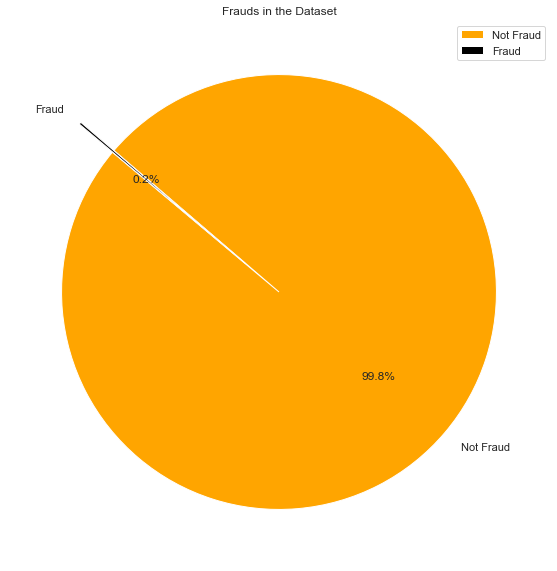

In [64]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = data['Size'].value_counts(sort = True)

colors = ["orange","black"]
explode = (0,0.2) 
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)

plt.title('Frauds in the Dataset')
plt.legend()
plt.show()

Grouping transactions based on the hour of the day - plotting the count of total transactions based on hour

<IPython.core.display.Javascript object>

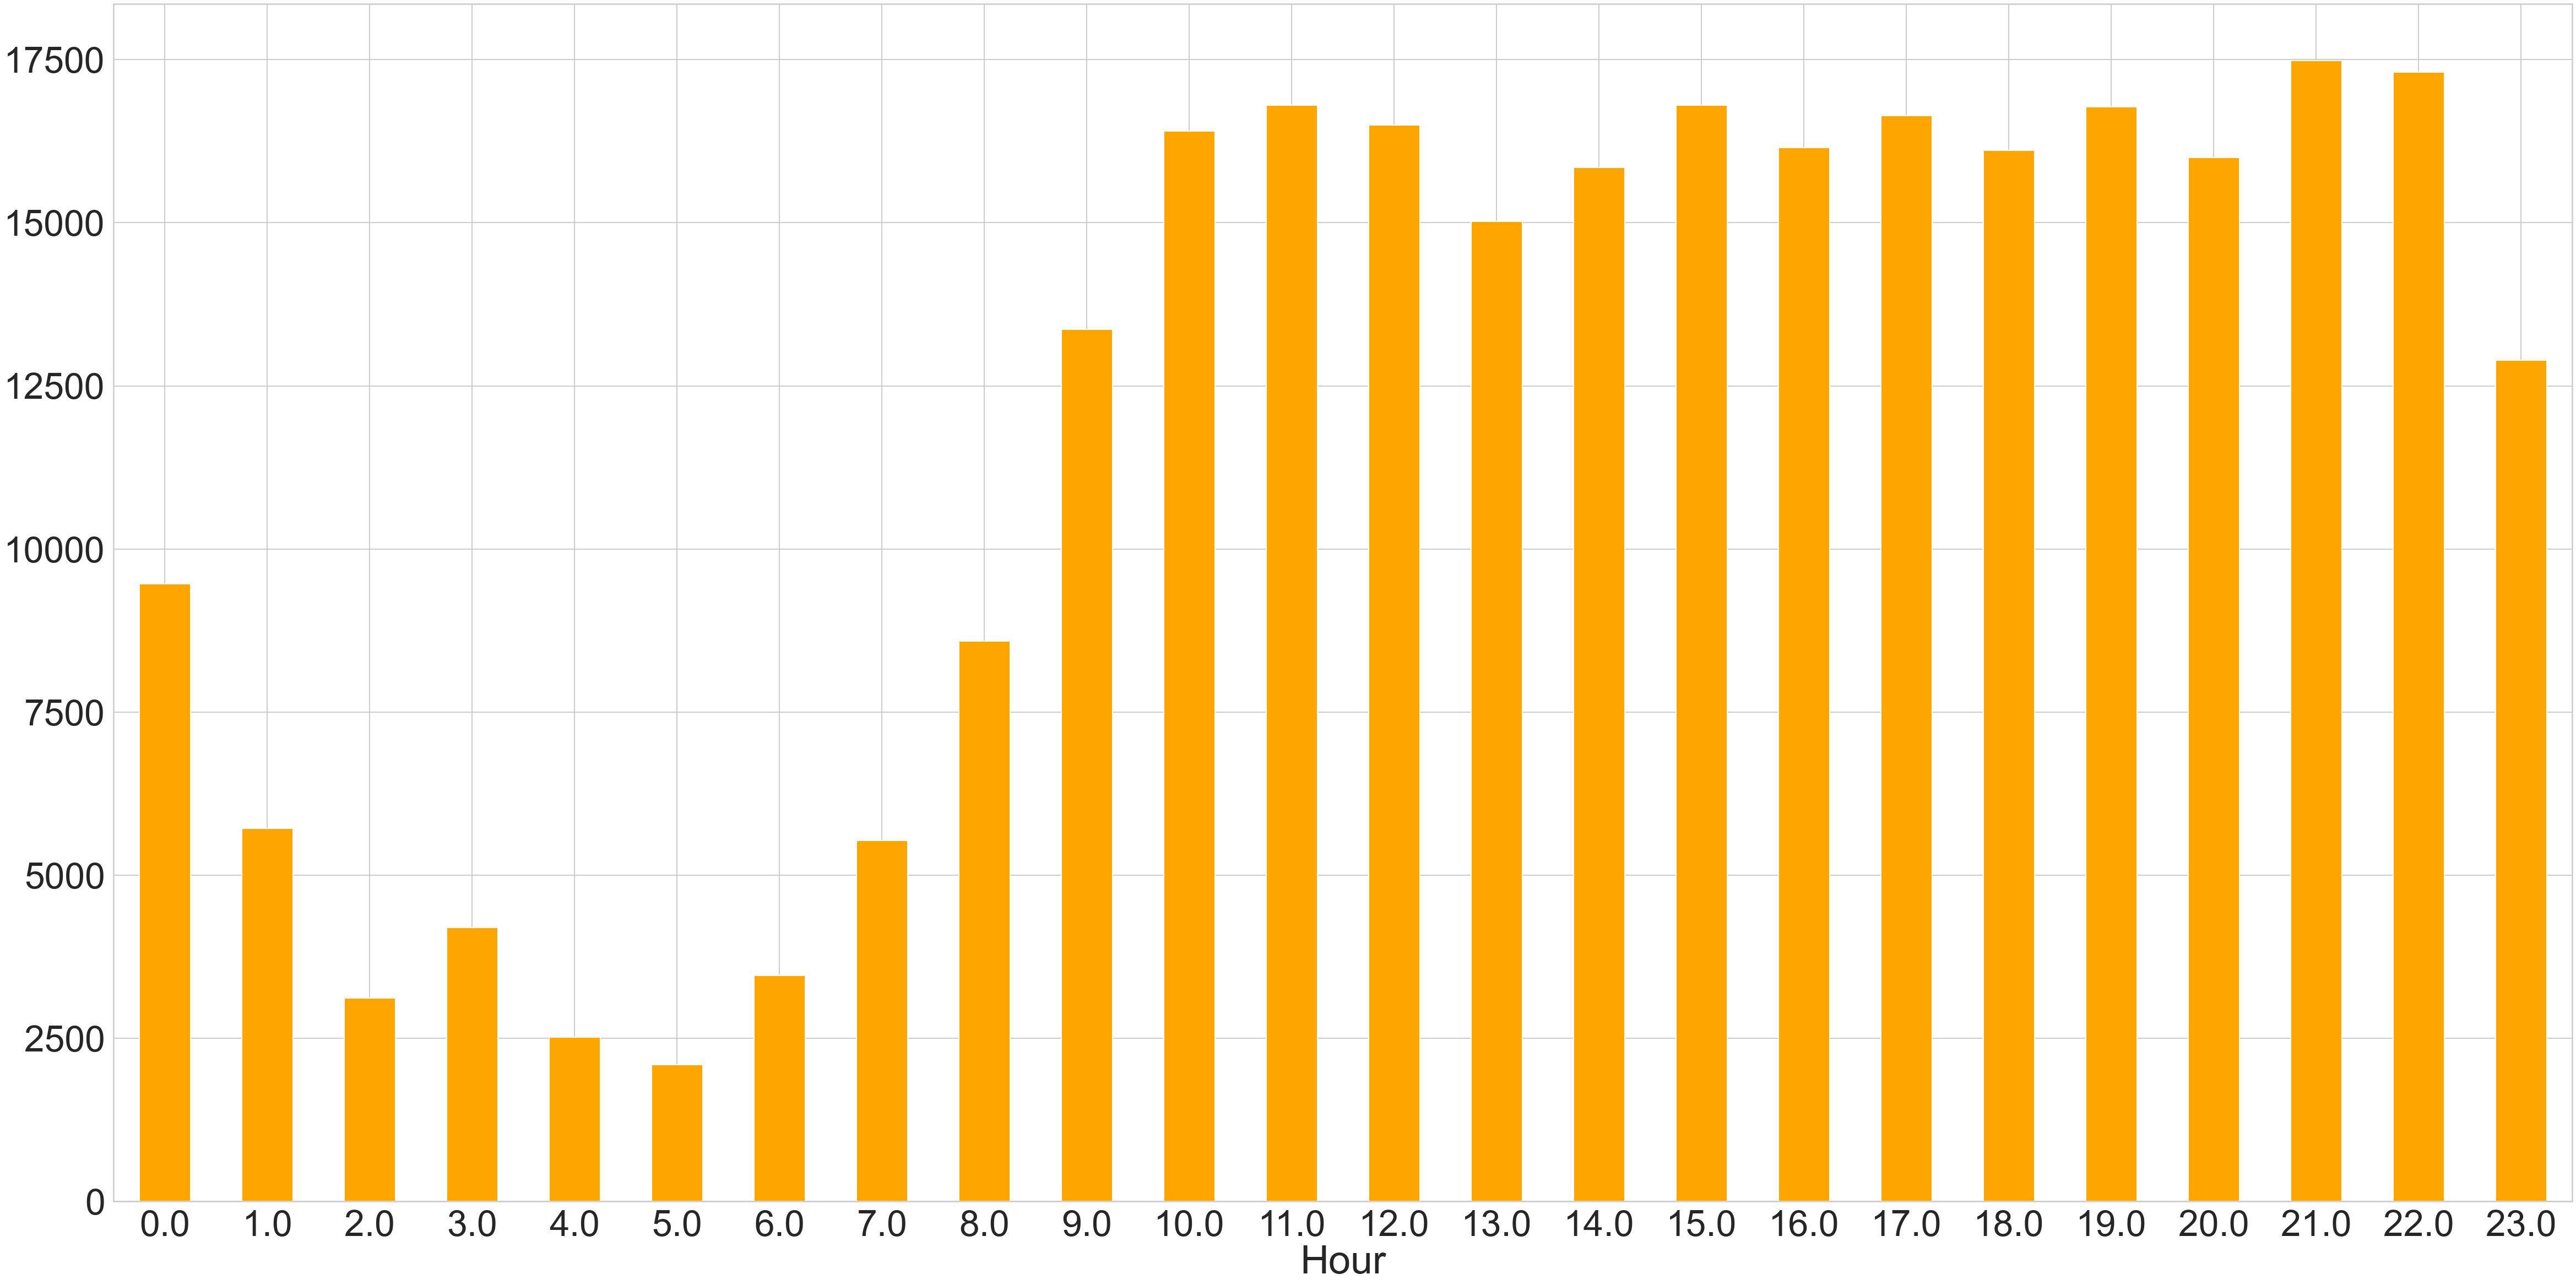

In [6]:
sns.set_context('poster',font_scale=3.0)
plt.rcParams['figure.figsize']=(80,40)
data.groupby('Hour')['Time'].count().plot(kind='bar',color='orange')
plt.xticks(rotation=360);

Grouping by data based in Size and Hour feature

In [7]:
hourly=data.groupby(['Size','Hour']).count()[['Time']].reset_index()

Plotting fraud and non fraud transactions based on hours of the day.

<IPython.core.display.Javascript object>

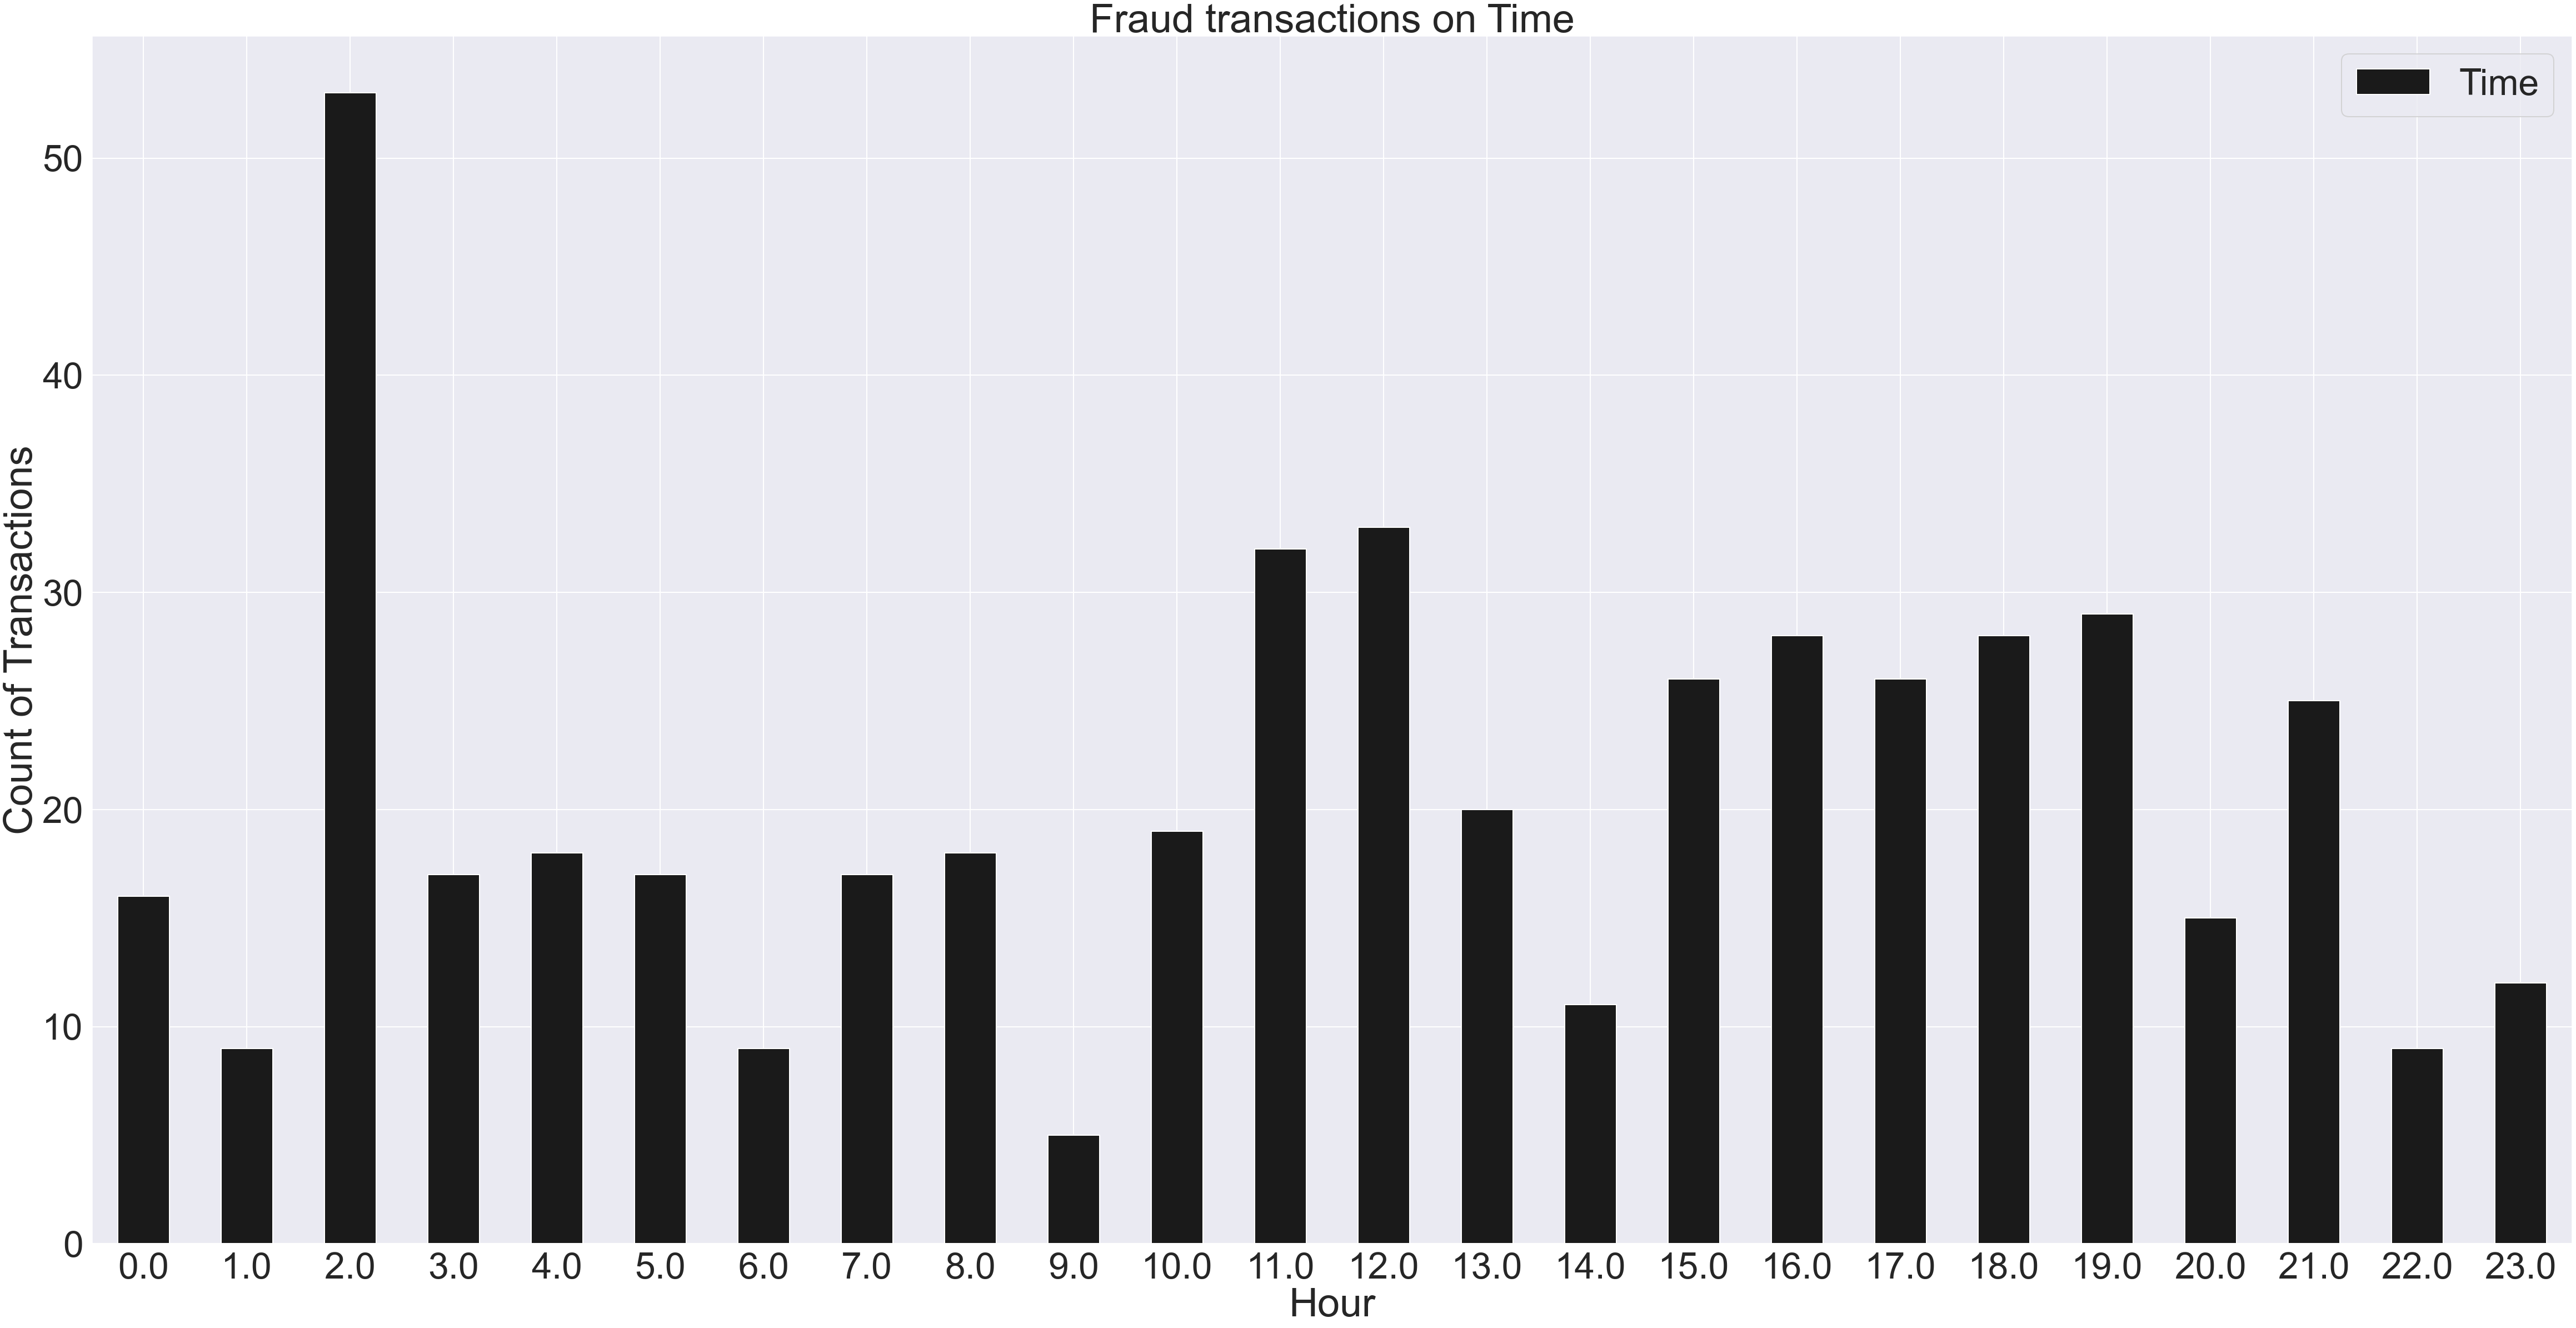

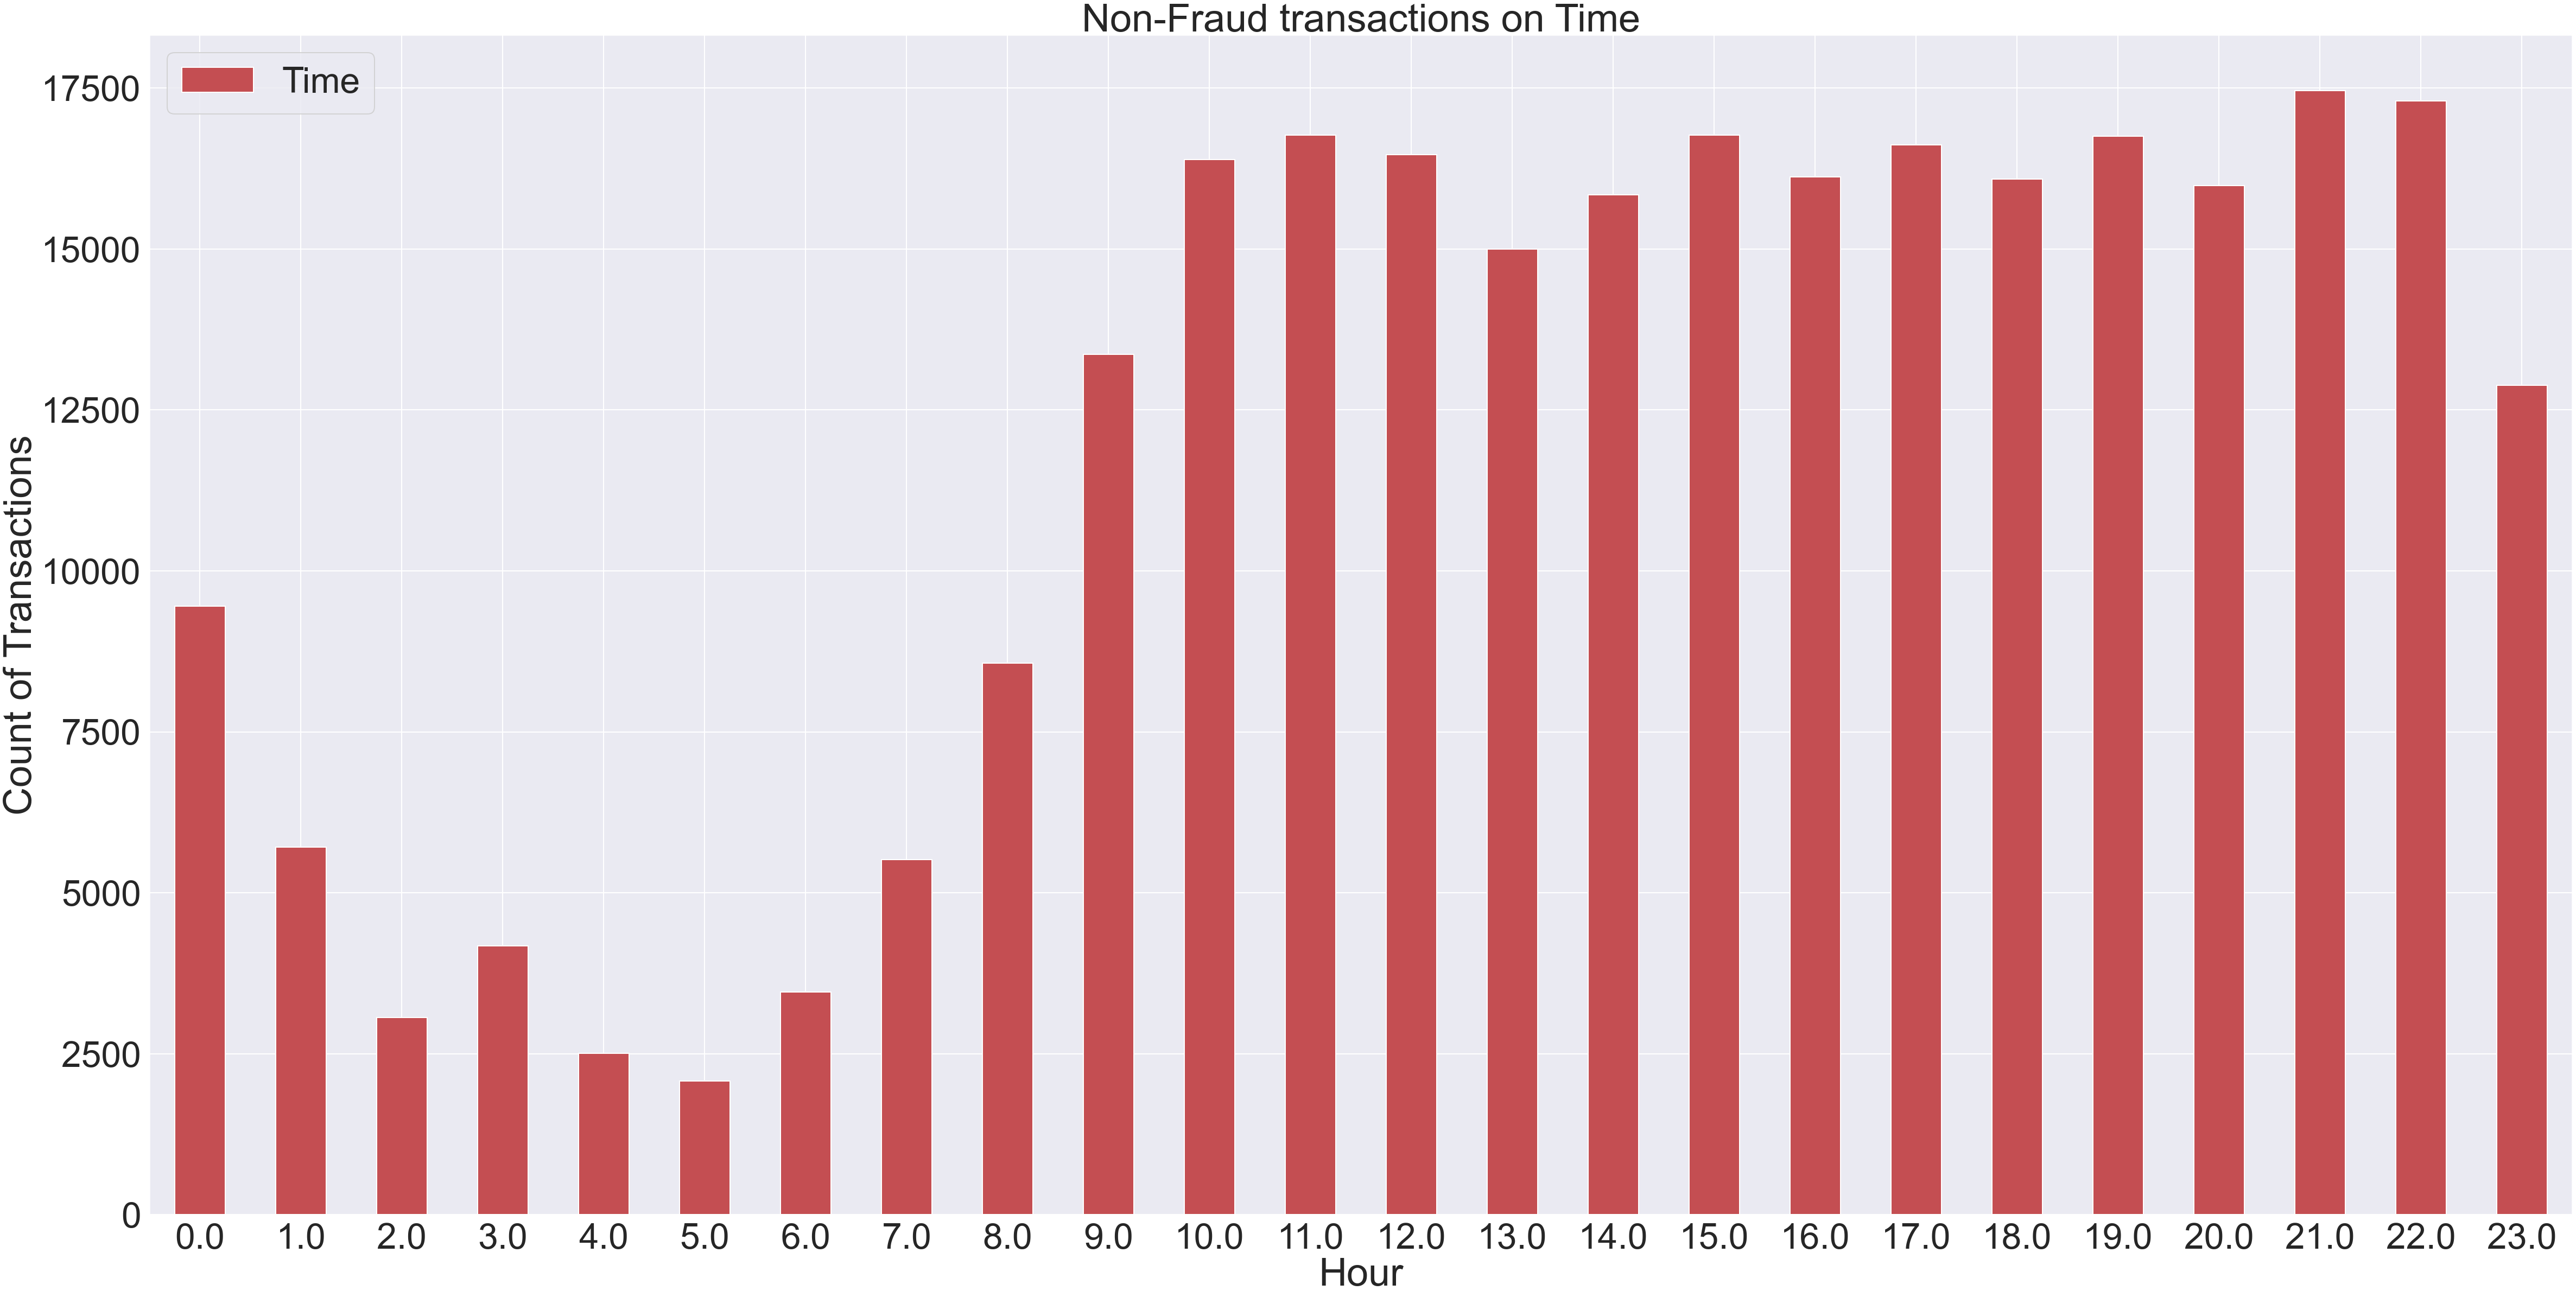

In [76]:
sns.set_context('poster',font_scale=3.0)
plt.rcParams['figure.figsize']=(80,40)

hourly[hourly['Size']=='Fraud'].set_index('Hour')[['Time']].plot(kind='bar',color='k')
plt.xticks(rotation=360);
plt.title('Fraud transactions on Time')
plt.ylabel('Count of Transactions')

hourly[hourly['Size']=='Not-Fraud'].set_index('Hour')[['Time']].plot(kind='bar',color='r')
plt.xticks(rotation=360);
plt.title('Non-Fraud transactions on Time')
plt.ylabel('Count of Transactions');


The count of Fraud and Not-Fraud transactions have not been shown on a same plot becuase of its difference in values.

Checking if any values are null, if there were, we would have to deal with the NAN values.

In [11]:
data.isnull().values.any()

False

Plotting the count of Fraud vs Not-Fraud transactions over the 2 day period.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

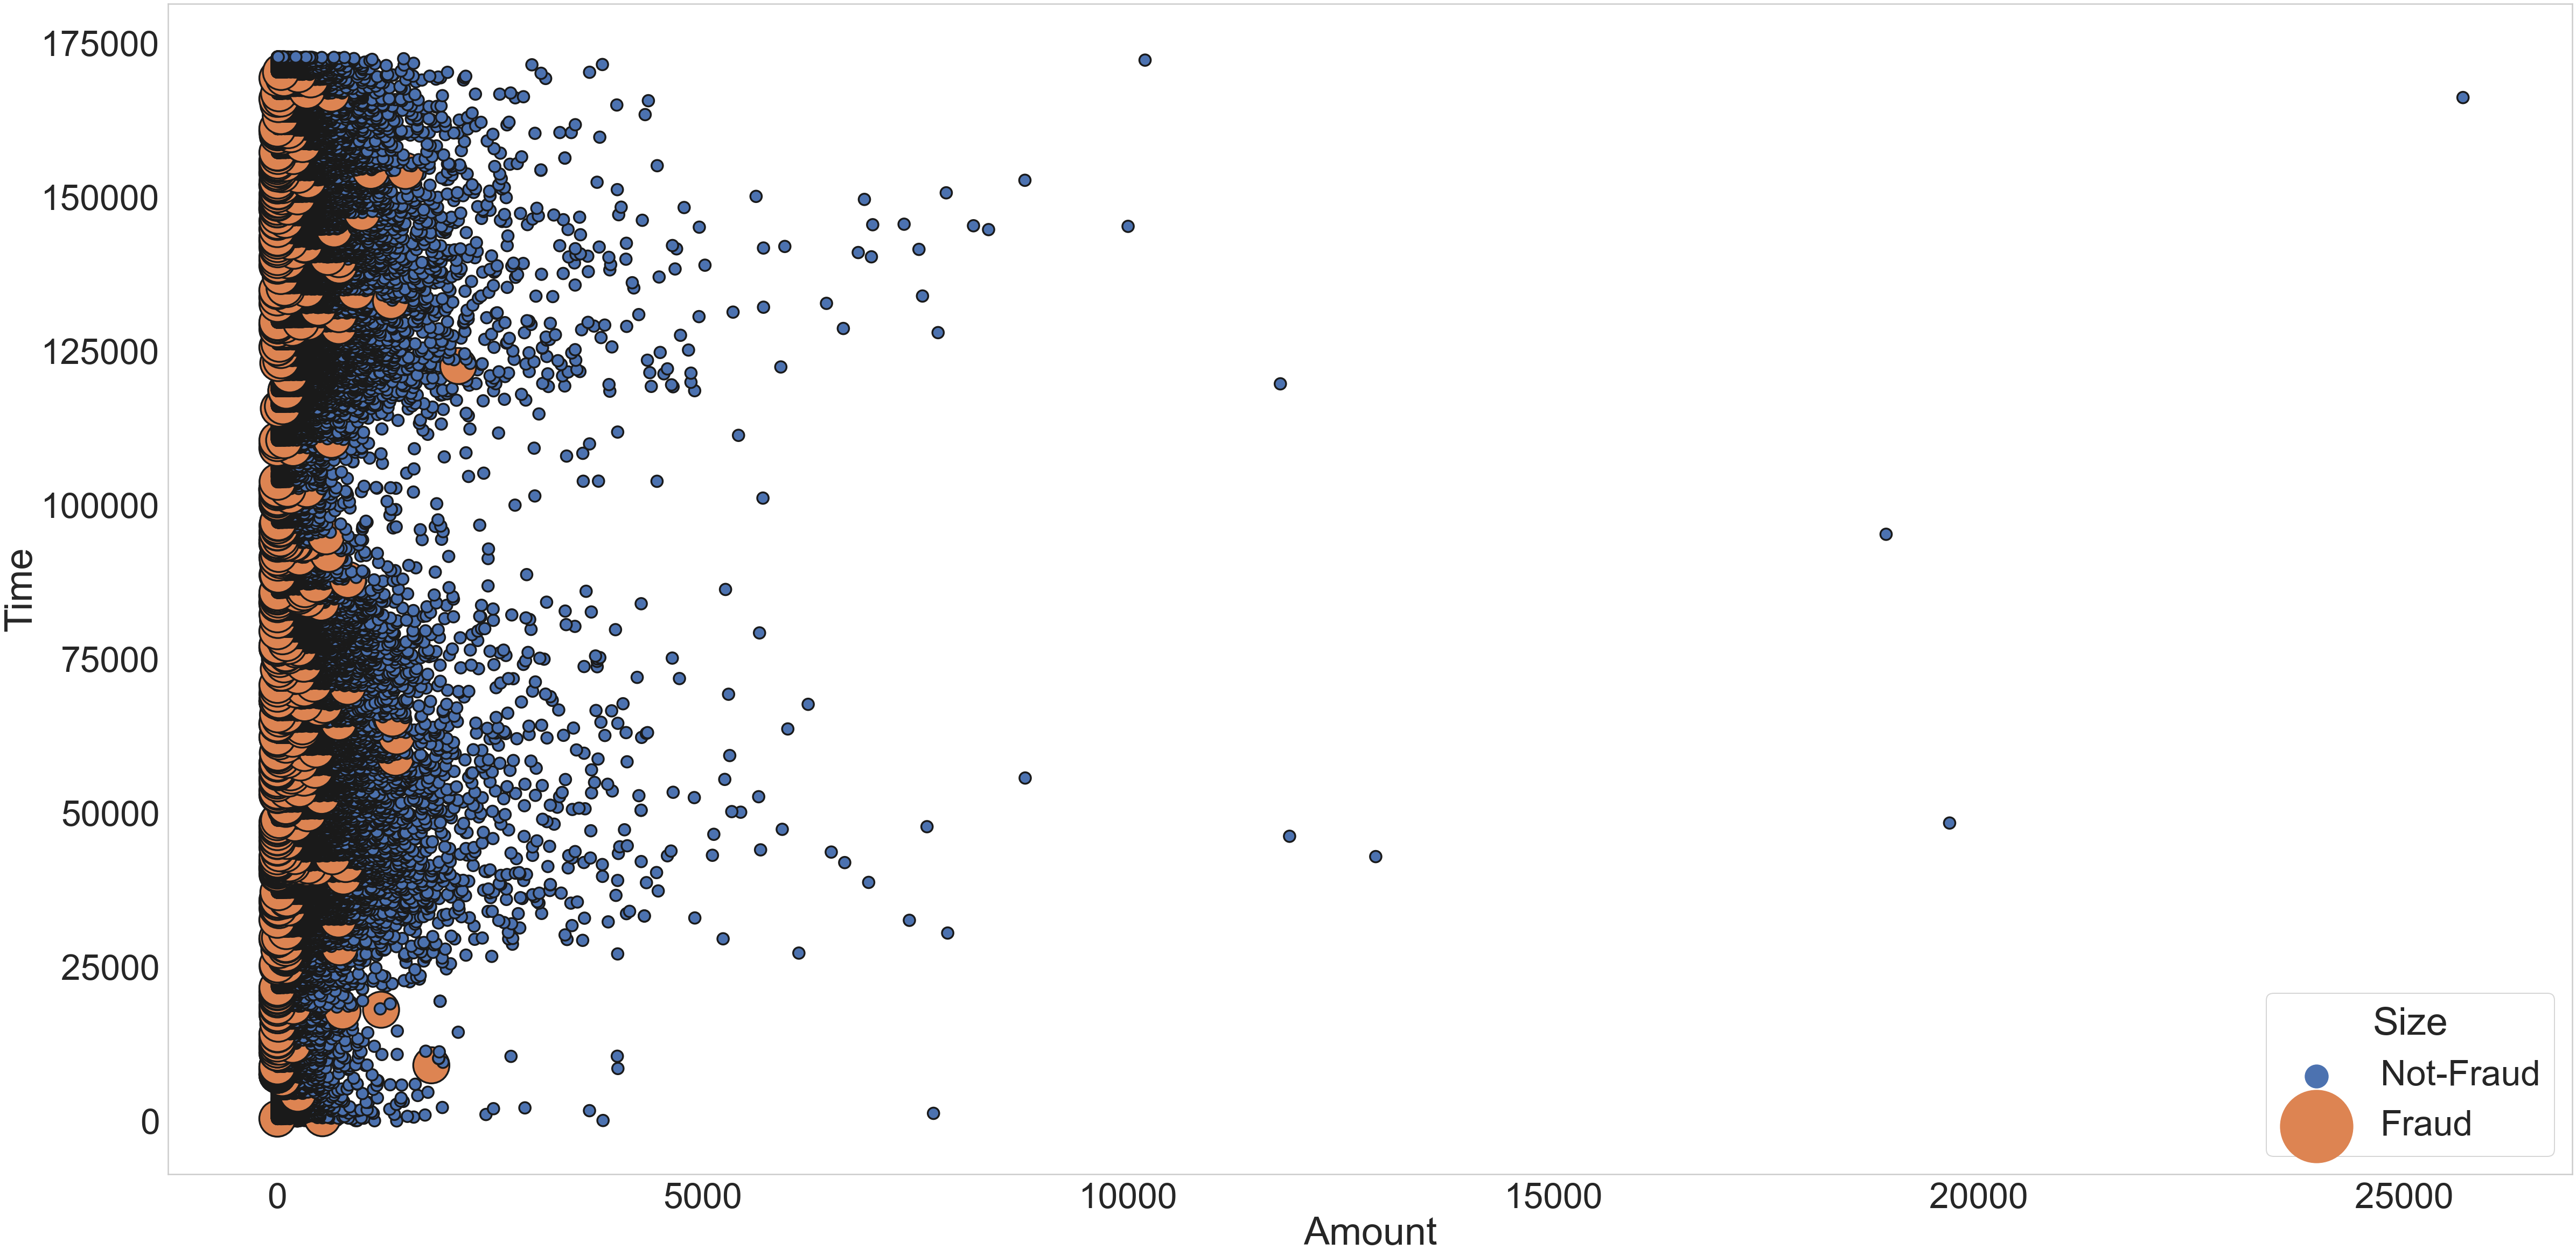

In [59]:
sns.set_context('poster',font_scale=3.0)
plt.rcParams['figure.figsize']=(80,40)
sns.scatterplot(data=data, x="Amount", y="Time", hue="Size",size="Size",
                size_order=("Fraud","Not-Fraud"), sizes=(1800,18000),marker=".",edgecolor="k")
plt.grid()

Description of the Fraud Amount data

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [60]:
# Description of the Non-Fraud Amount data
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Plotting the Distribution of the Fraud and Non-Fraud transactions Amounts.


The dataset provided is basically an imbalanced dataset; The number of non-fraud transactions comprises 
more than 99%. As the non-fraud transactions are way more than the fraud transactions, putting them on the 
same scale of mmount is tough. So for the non-fraud transactions, we have scaled the y-axis to a logarithmic 
scale. This lets us to see skewed data better.
Read more about it here : https://bit.ly/3da4HE5

<IPython.core.display.Javascript object>

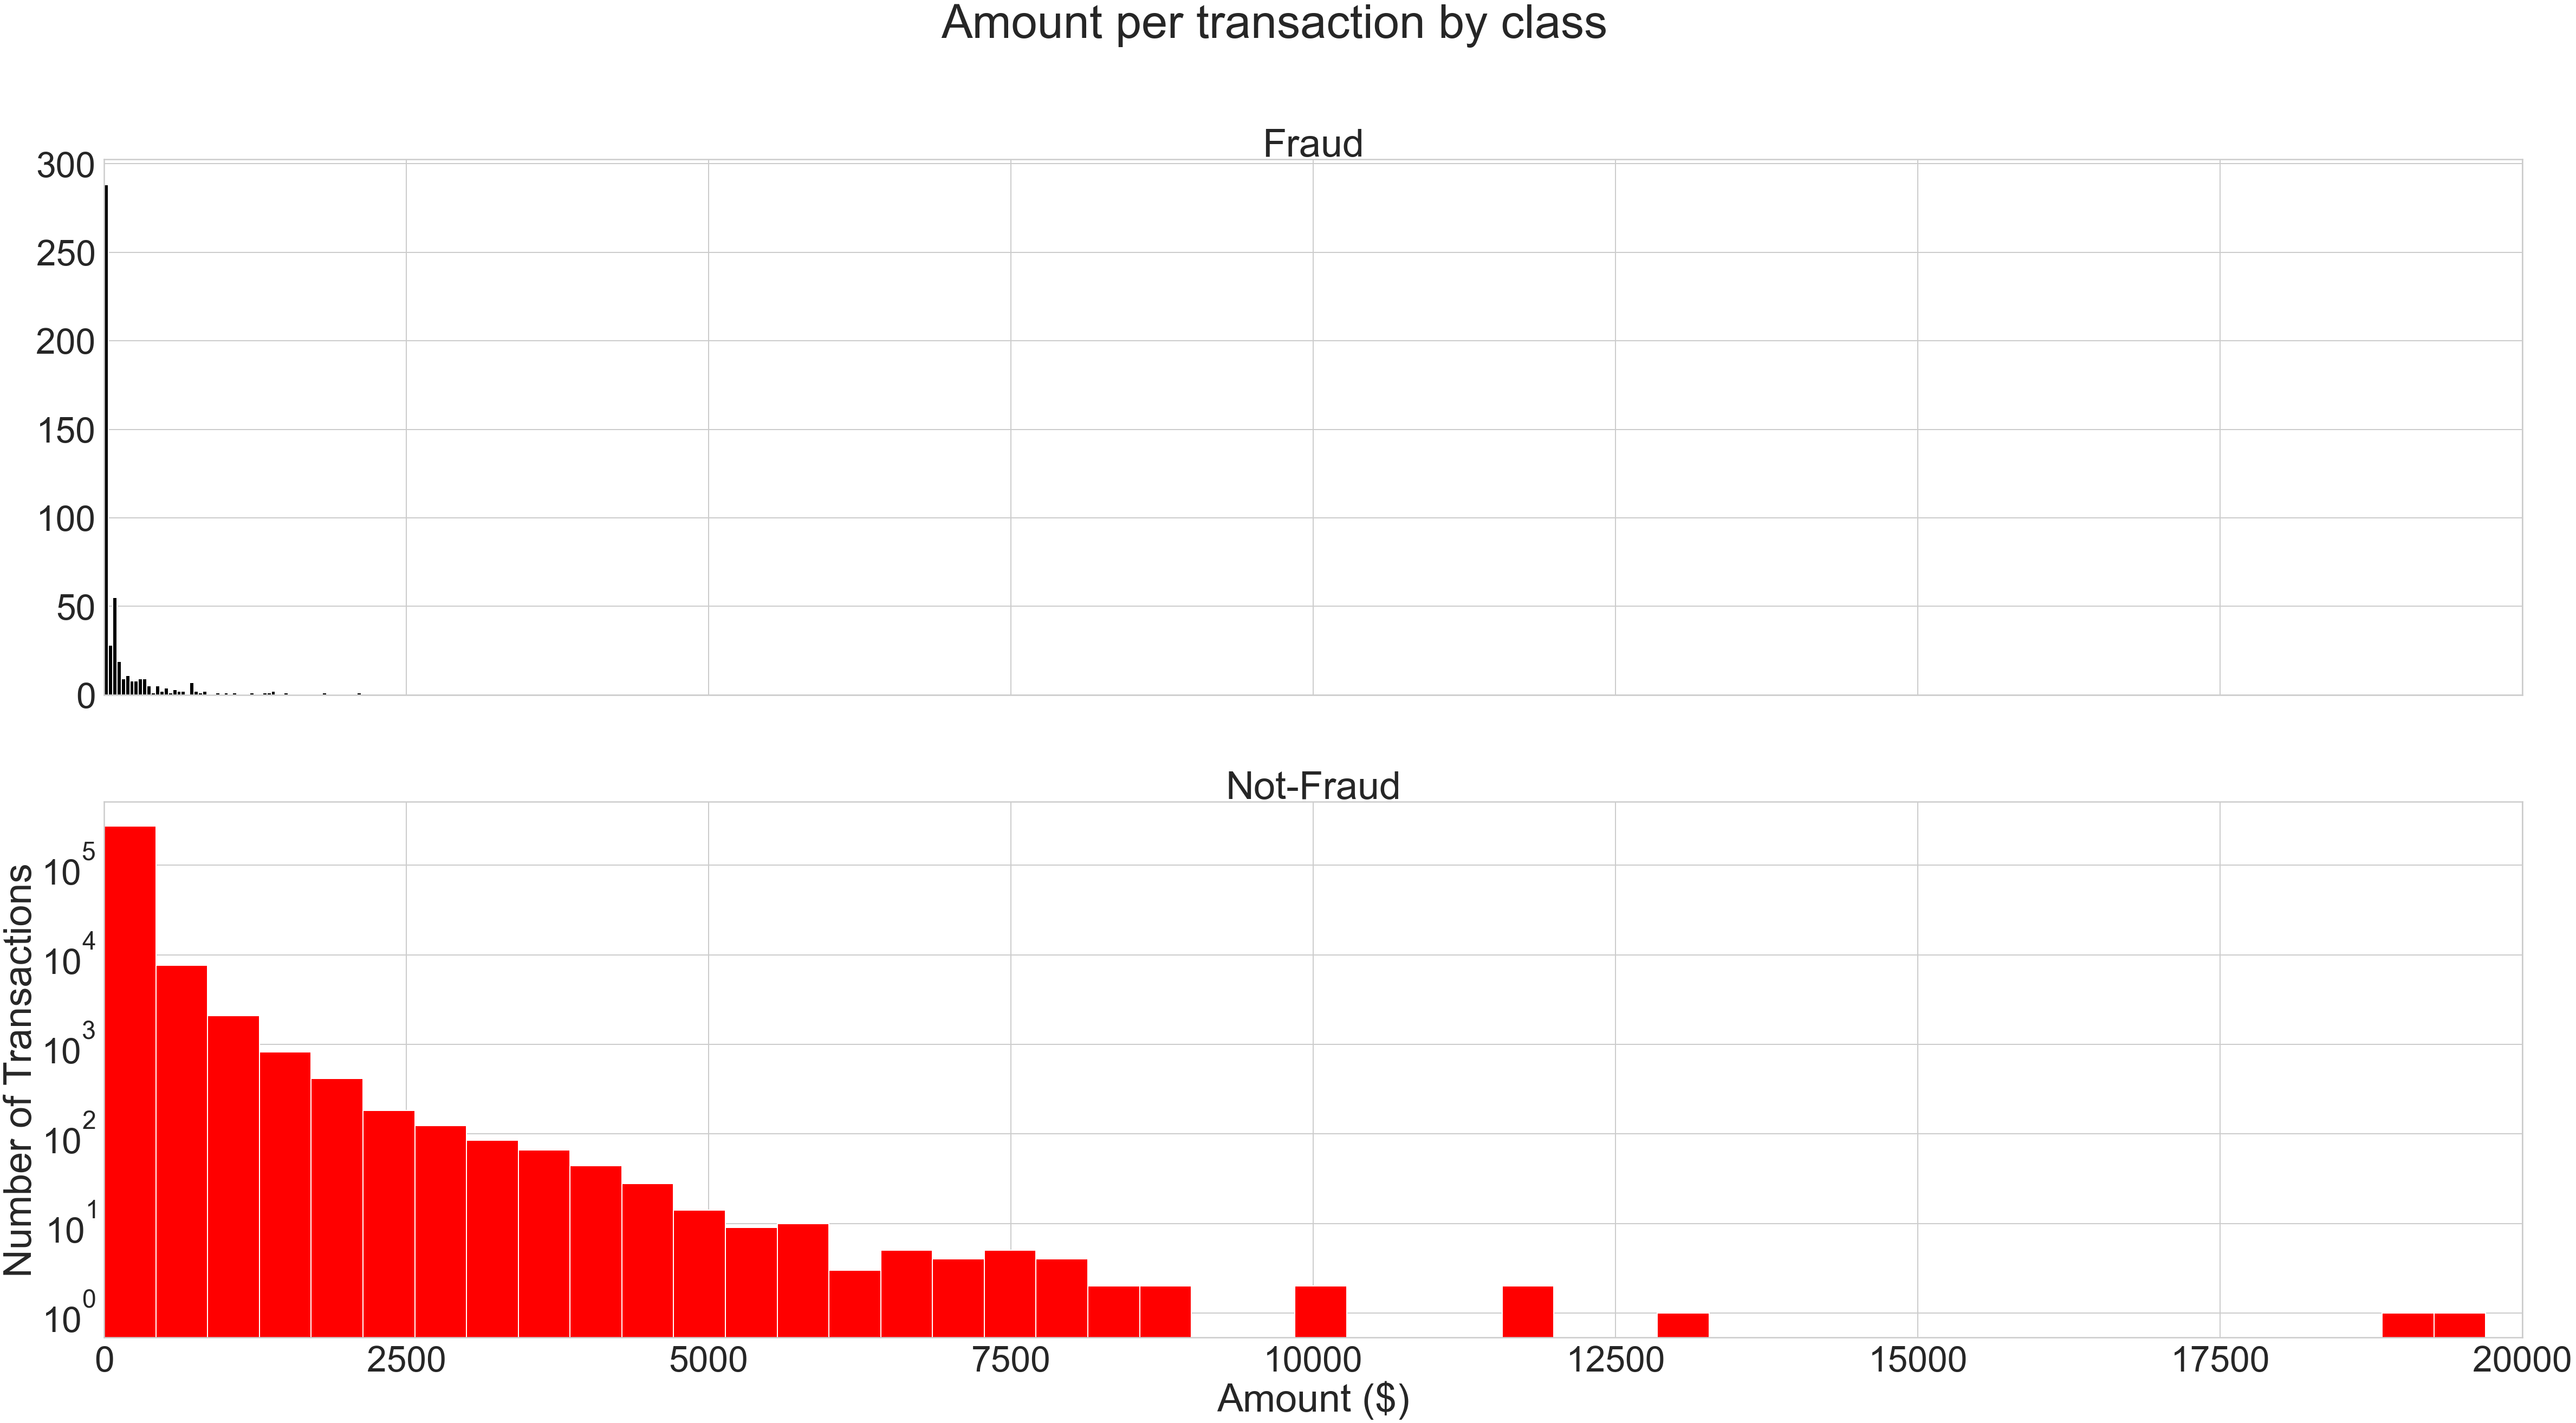

In [62]:
sns.set_context('poster',font_scale=3.0)
plt.rcParams['figure.figsize']=(80,40)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 60
ax1.hist(fraud.Amount, bins = bins,color='black')
ax1.set_title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
ax2.hist(not_fraud.Amount, bins = bins,color='red')
ax2.set_title('Not-Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

# Machine Learning

This section deals with the building the Machine learning model and then use it for prediction.
We have used multiple models for building and for prediction purposes and we have used them to compare which
model have suited this dataset best.

While accuracy is a measure for most of the machine learning models, accuracy will not be valid measure for this
dataset as its a unbalanced dataset. Accuracy would always be high because its the ratio of the sum of True positives and true negatives over the sum of all data points. 

The most important metric that we have to focus on while working with unbalanced data-set is Precision and Recall. 
Precision basically tells us that out of the results classified as positive by our model, how many were actually positive.
Recall tells us how many true positives (points labelled as positive) were recalled or found by our model.

While we have two classes in the analysis, Fraud (0) and Non-Fraud (1) transactions, we have to check the precision and recall for both the classes. We would look into the confusion matrix as well, a confusion matrix is a 2x2 matrix that lets us determine the numbers of true positives, true negatives, false positives and false negatives.

Finally, we would also check the AUC-ROC curve for each classifier model. AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the Higher the AUC, the better the model is at distinguishing between transactions which are fraud and which are not.

Read more about AUC-ROC here: https://towardsdatascience.com/understanding-the-roc-and-auc-curves-a05b68550b69

Read and know about dealing with imbalanced dataset : https://www.jeremyjordan.me/imbalanced-data/

# 2 Feature Logistic Regression - Predicting 'Class' feature based on 'Time' and 'Amount' feature.

The dataset has 31 features, Time, V1-V28, Amount and Class. The reason the features were named V1-V28 is because of confidentiality from the source. So first we wanted to run the classifier on the features which arent V1-V28 (just for the sake of running a model) using three features : Time, Amount and Class.


Predicting Class based on the labels Time and Amount of the transaction.

In [16]:
X=data[['Time','Amount']]
Y=data[['Class']]

Splitting the data set into train and test.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=101)  

Fitting the model:

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

Predicting the model on the test data

In [19]:
predictions = logmodel.predict(X_test)

Printing the classification report that lets us see the precision and recall for individual classes.

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.00      0.00      0.00       144

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



A recall of 0% for the fraud transactions implies that the model has not predicted a single fraud transaction and hence we can safely say that this classifier hasnt worked well. This is imperative because we have considered only 3 features out of 31 to build the classifier. Removing the 28 features shows us that the model has not been generalised well, as the class of the model must depend of the removed features.

Plotting the ROC-AUC curve.

ROC AUC: 0.500


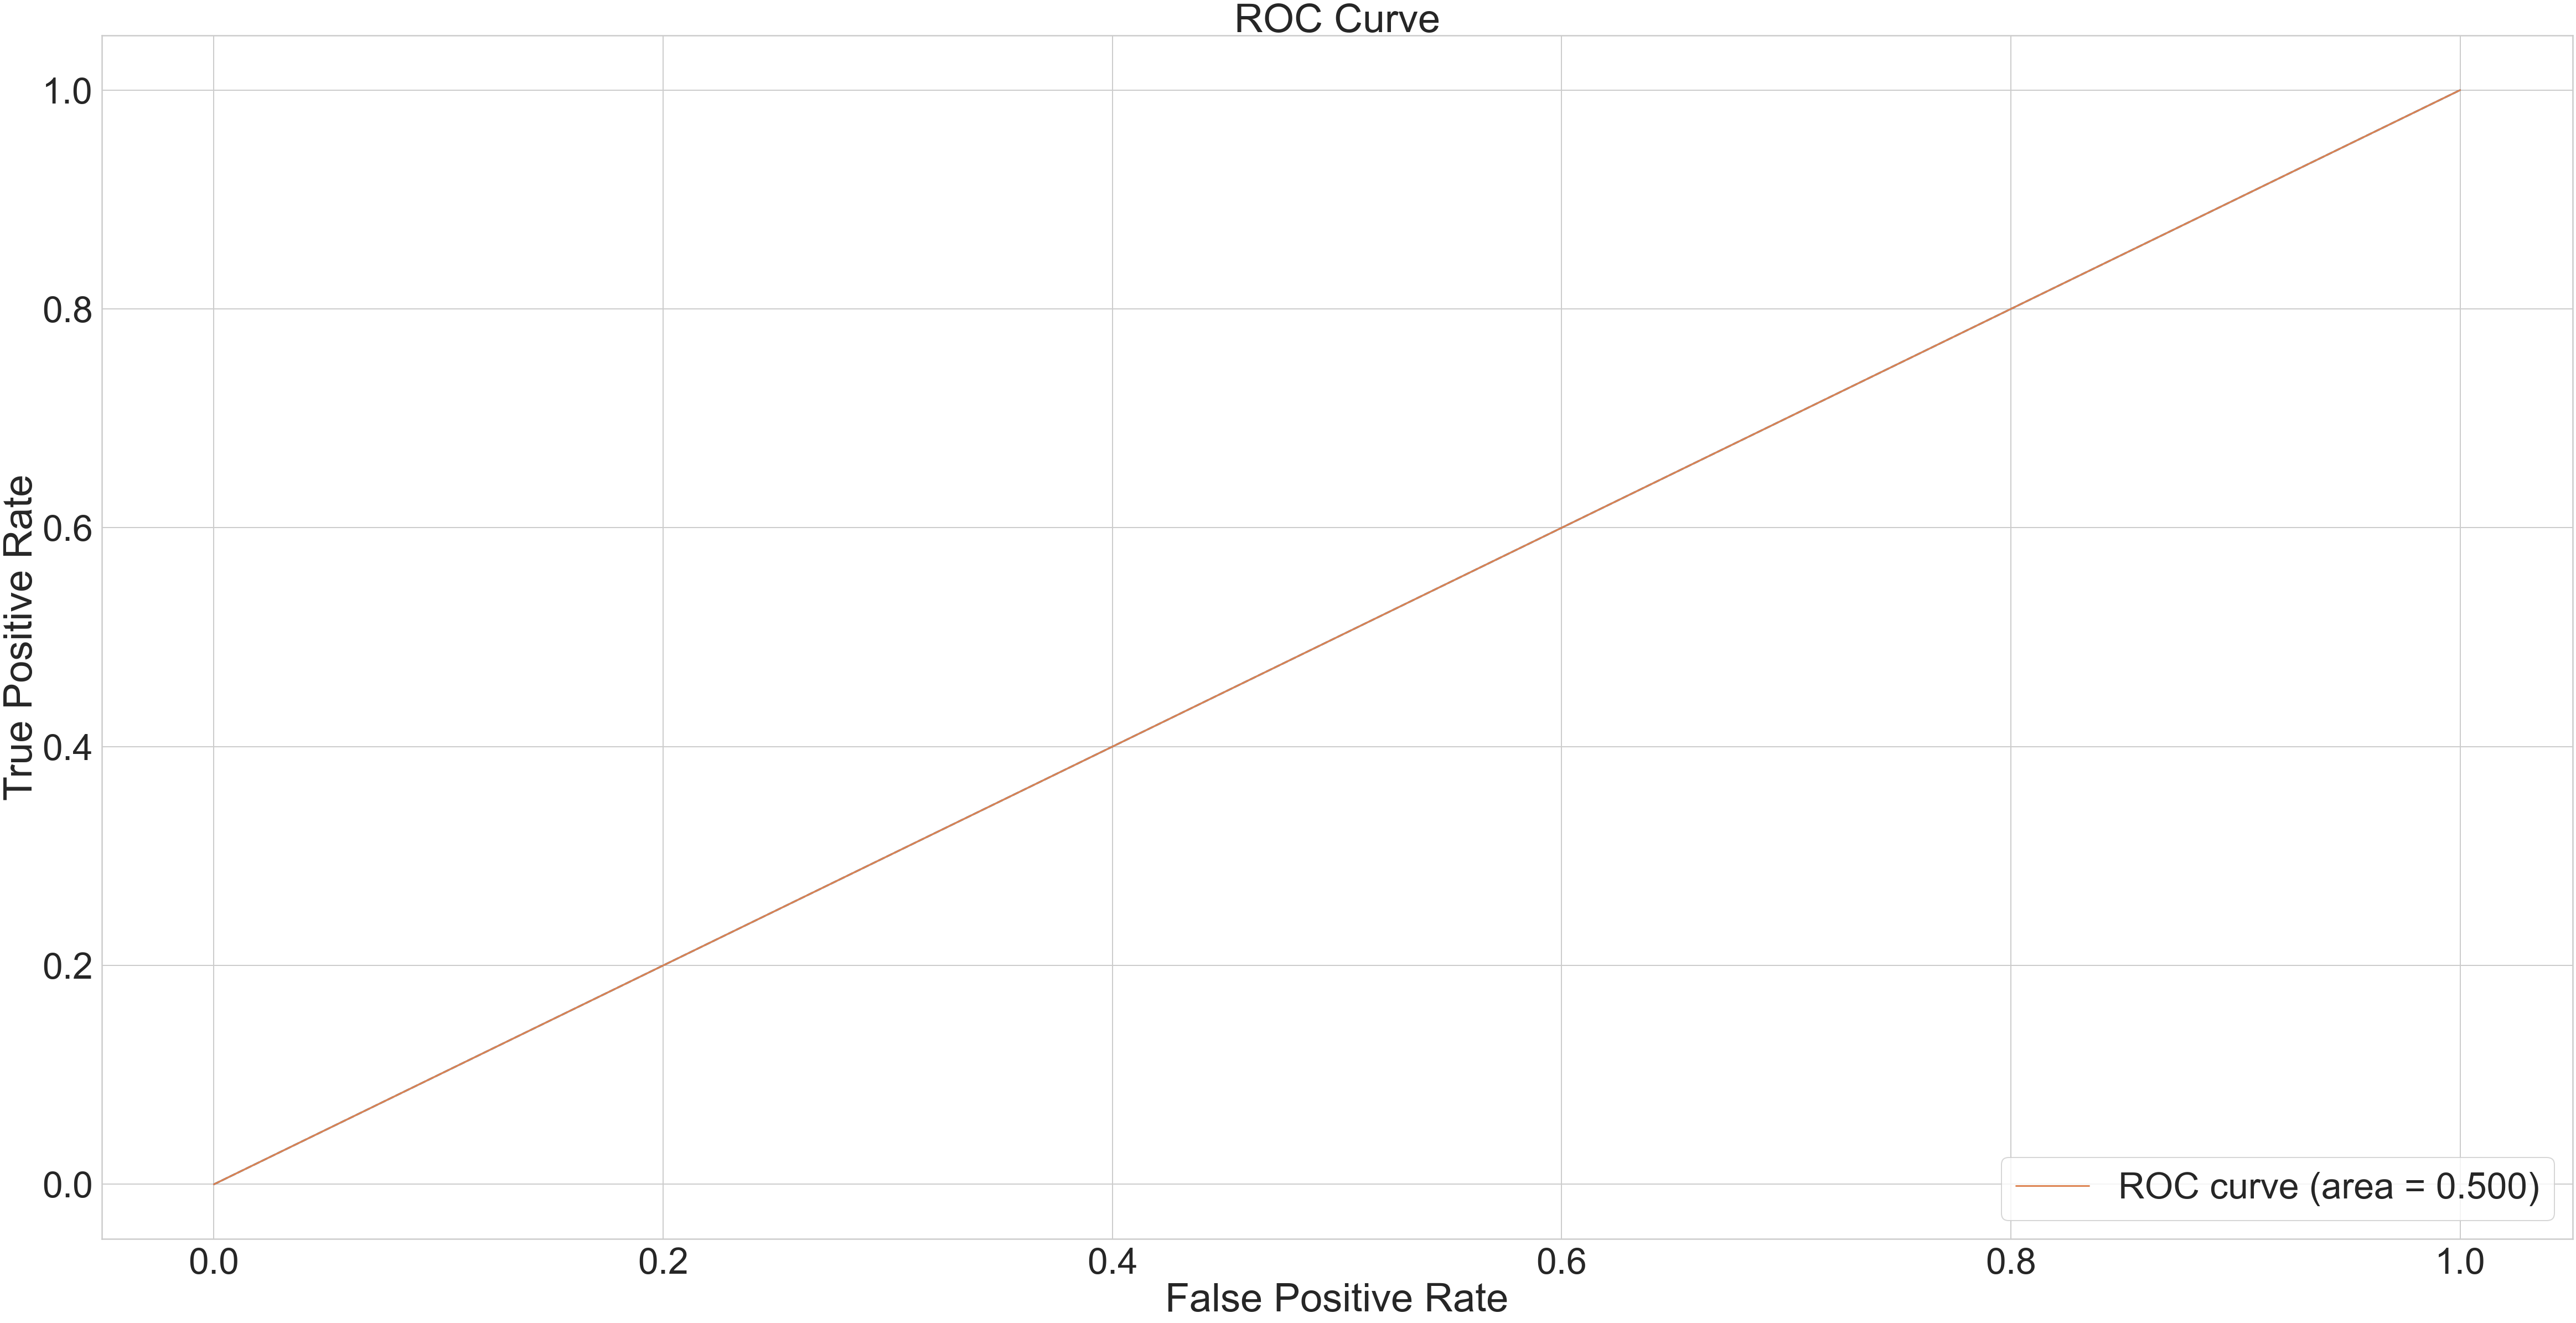

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.3f' % roc_auc )
#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

From the ROC-AUC curve, we can see that the ROC-AUC value is 0.5. A ROC-AUC value of 0.5 means that the model has predicted only 50% of the either classes.
This can be explained using a simple analogy. Considering we have a fair coin which has a probability of 0.5 for either head or tail. So if we guess the outcome of a coin flip, it would be correct only 50% of the times. This classifier's result is kind-off the same, there is 50% probability that the outcome of such a model would be correct, which is machine learning terms is pretty bad.

# Logistic Regression - Predicting 'Class' based on all features.

In [23]:
X=data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
Y=data[['Class']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=101)                                     

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.72      0.69      0.70       144

    accuracy                           1.00     85443
   macro avg       0.86      0.84      0.85     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.844


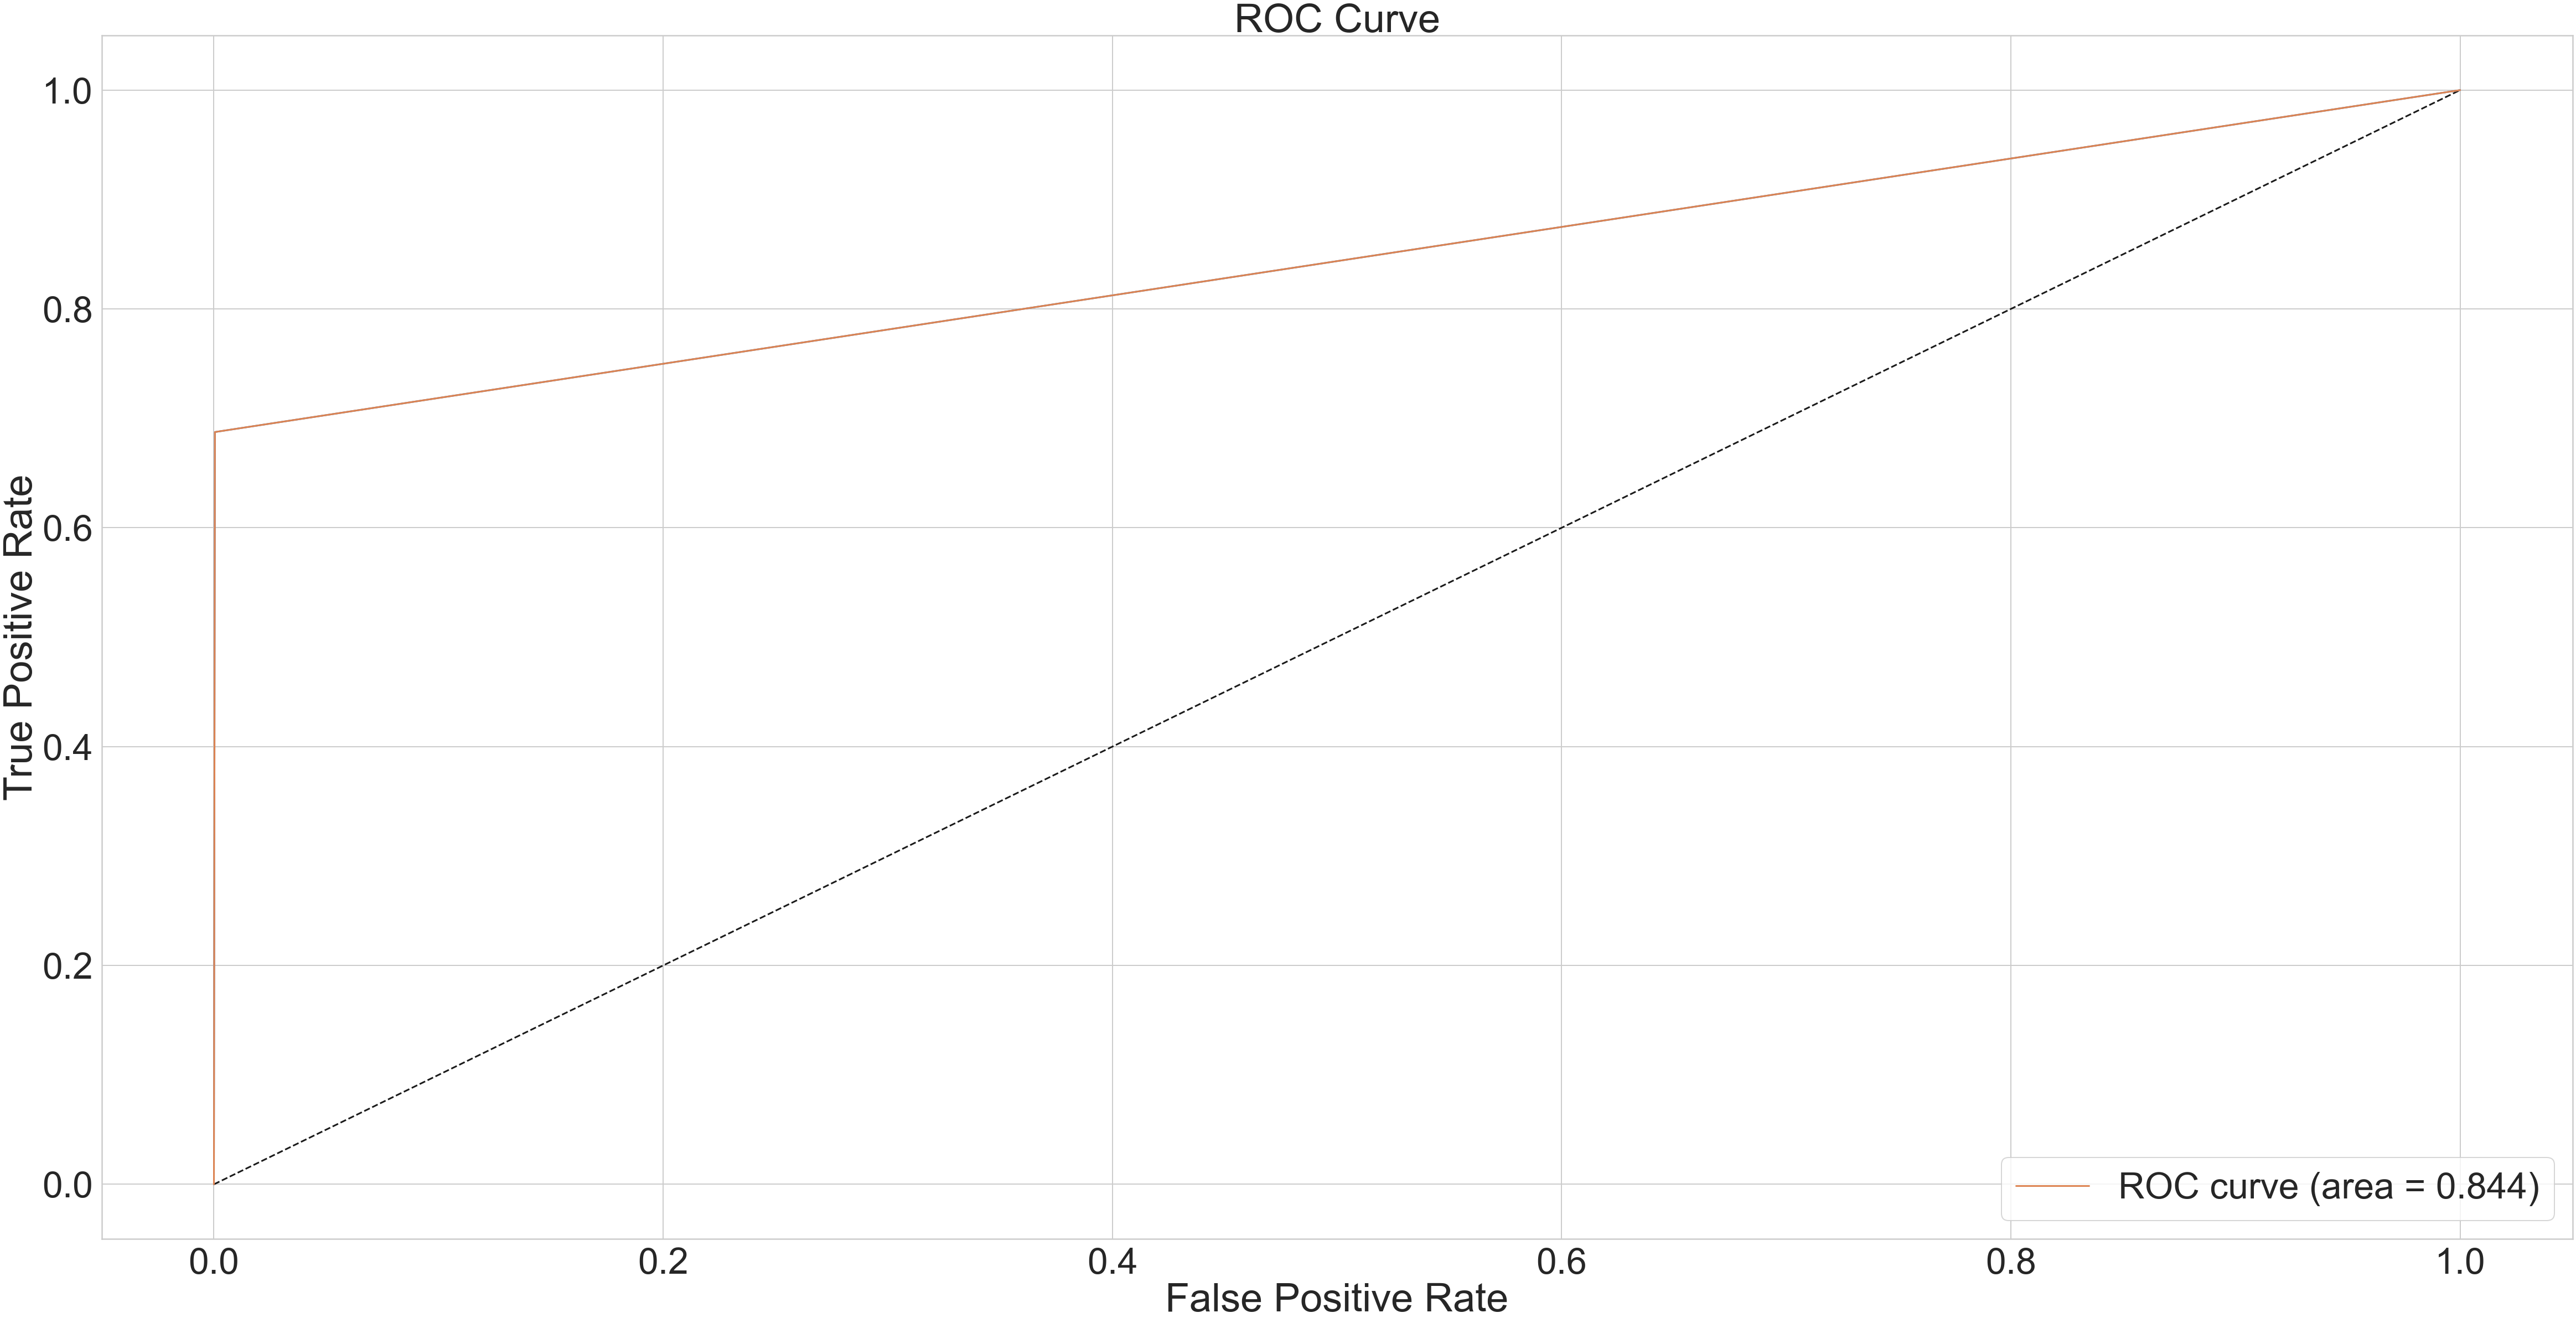

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.3f' % roc_auc )
#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

From the ROC-AUC curve, we can see that the ROC-AUC value is 0.833. The Recall rate is 67% which is way better than the model with 2 features. This also implies the importance of the other features for building the classifier.

# SVC - Support Vector Classifier

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [28]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [29]:
predictions = model.predict(X_test)

In [30]:
print(confusion_matrix(y_test,predictions))

[[85299     0]
 [  144     0]]


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.00      0.00      0.00       144

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.500


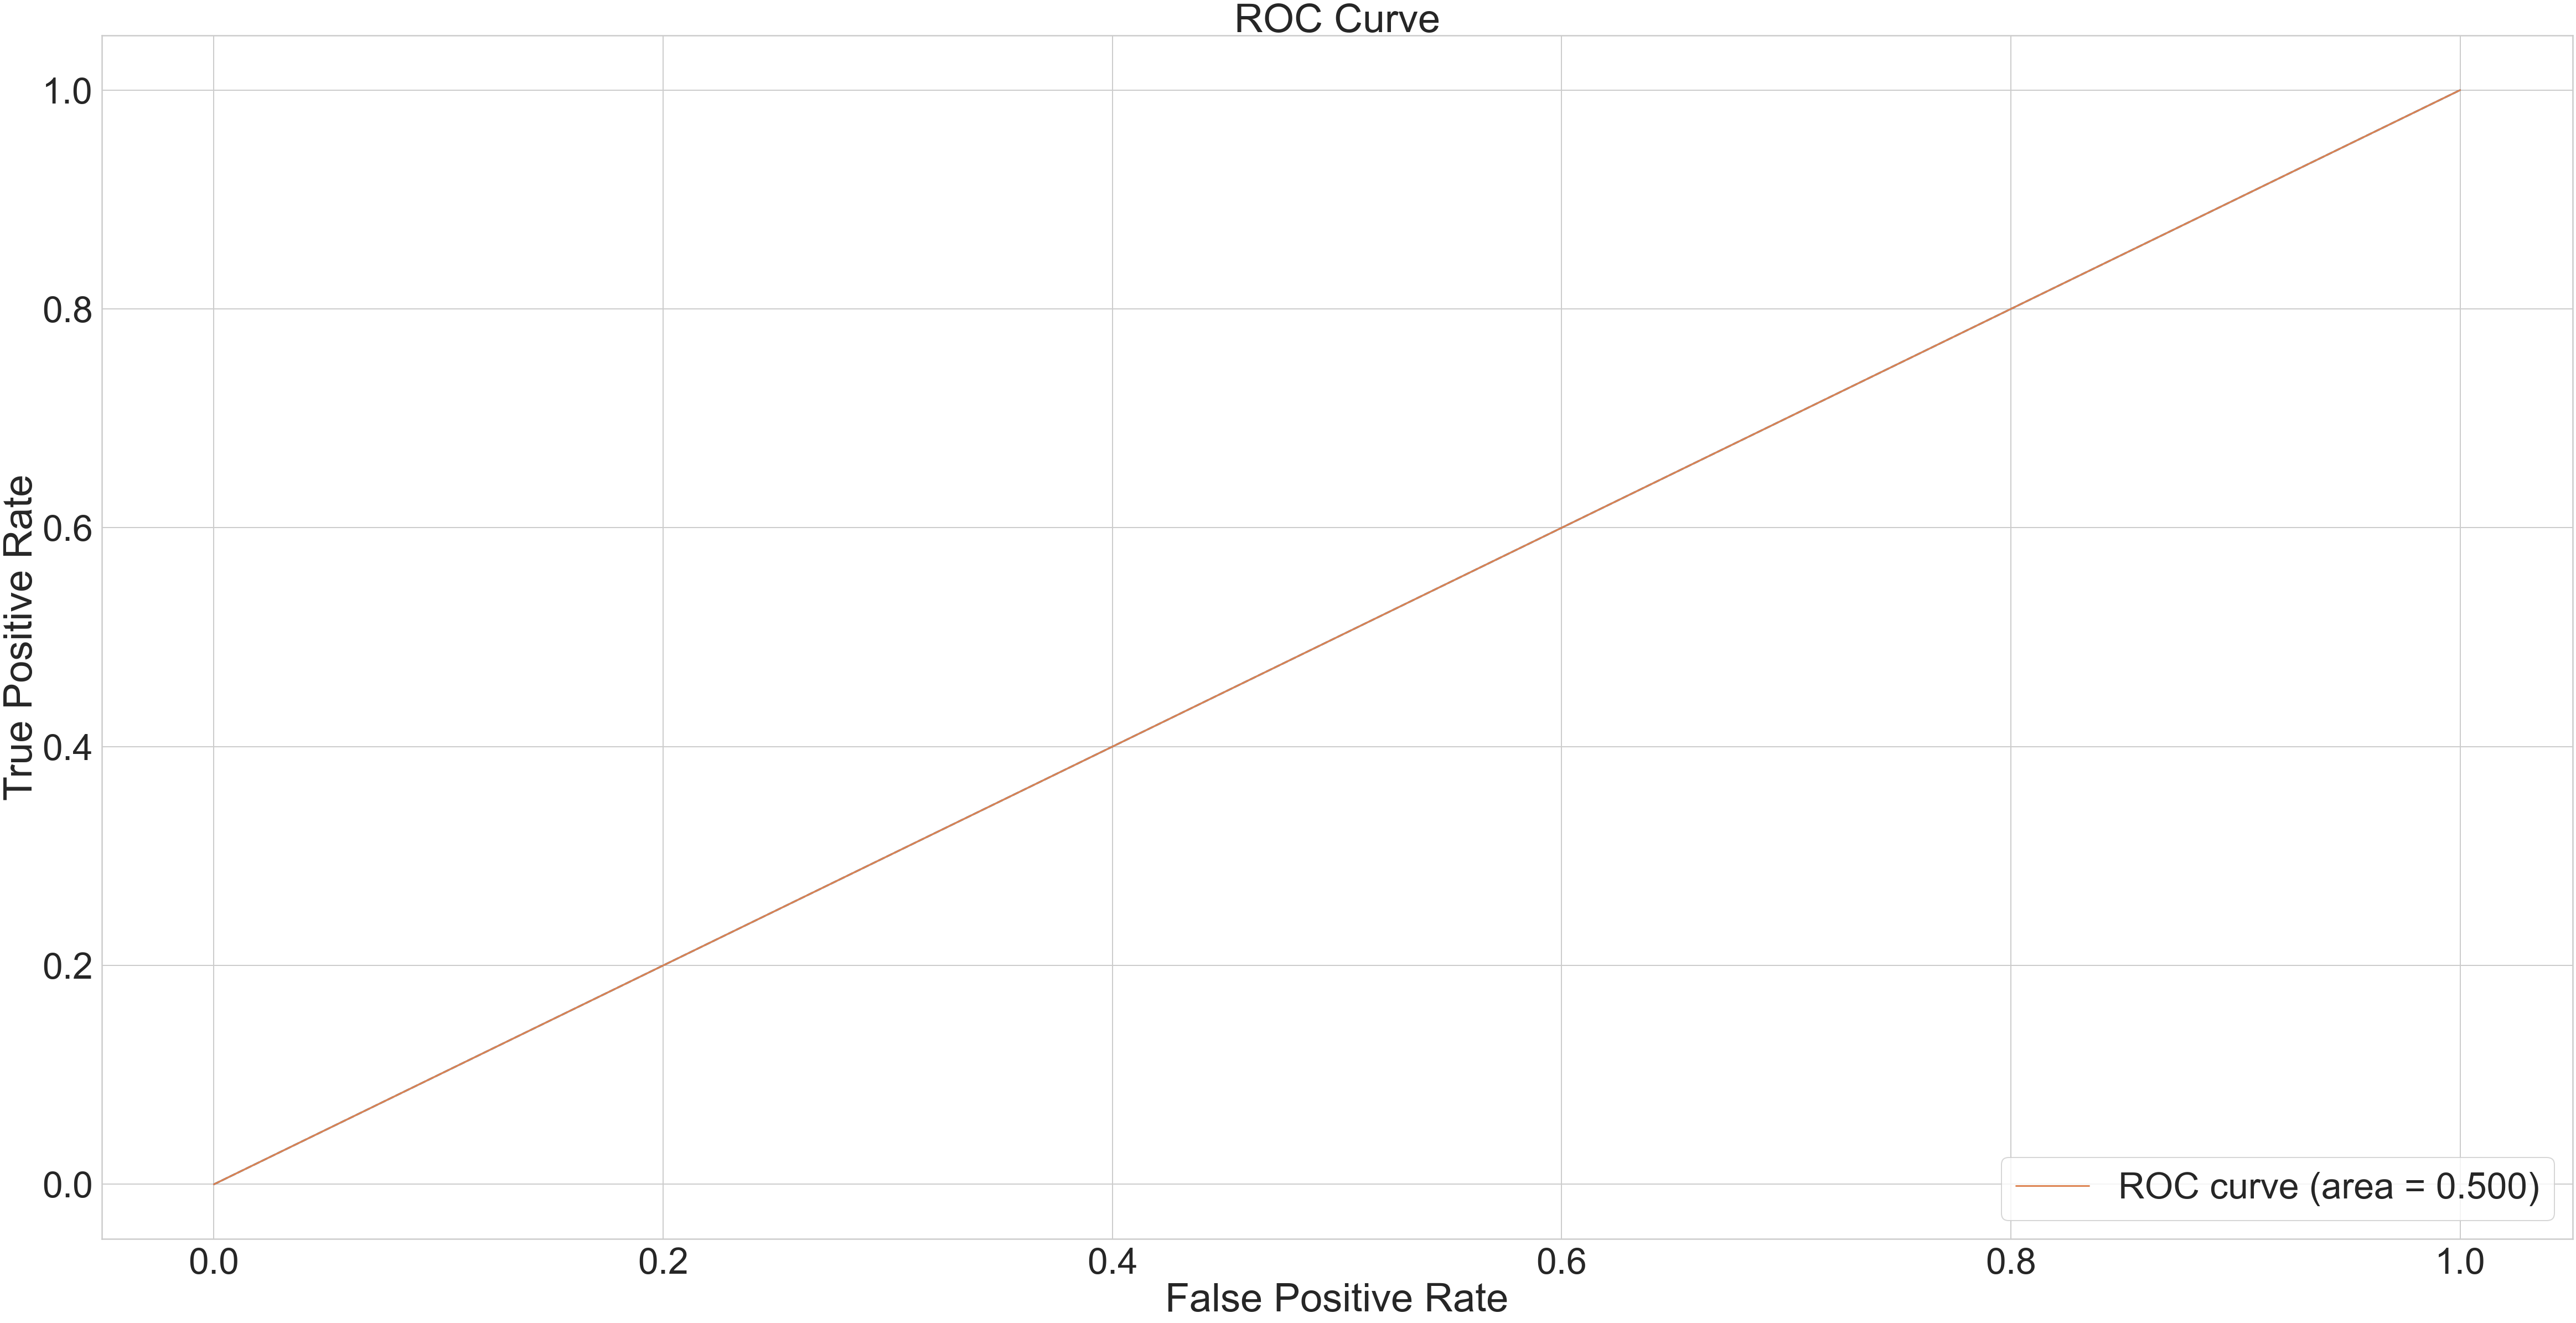

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

This model has a recall of 0% which means Support Vector Machine doesnt perform well on the data. Similar to the 2 feature logistic regression, the ROC-AUC value is 0.5.

# Decision Tree

 Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[85259    40]
 [   29   115]]


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.74      0.80      0.77       144

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.899


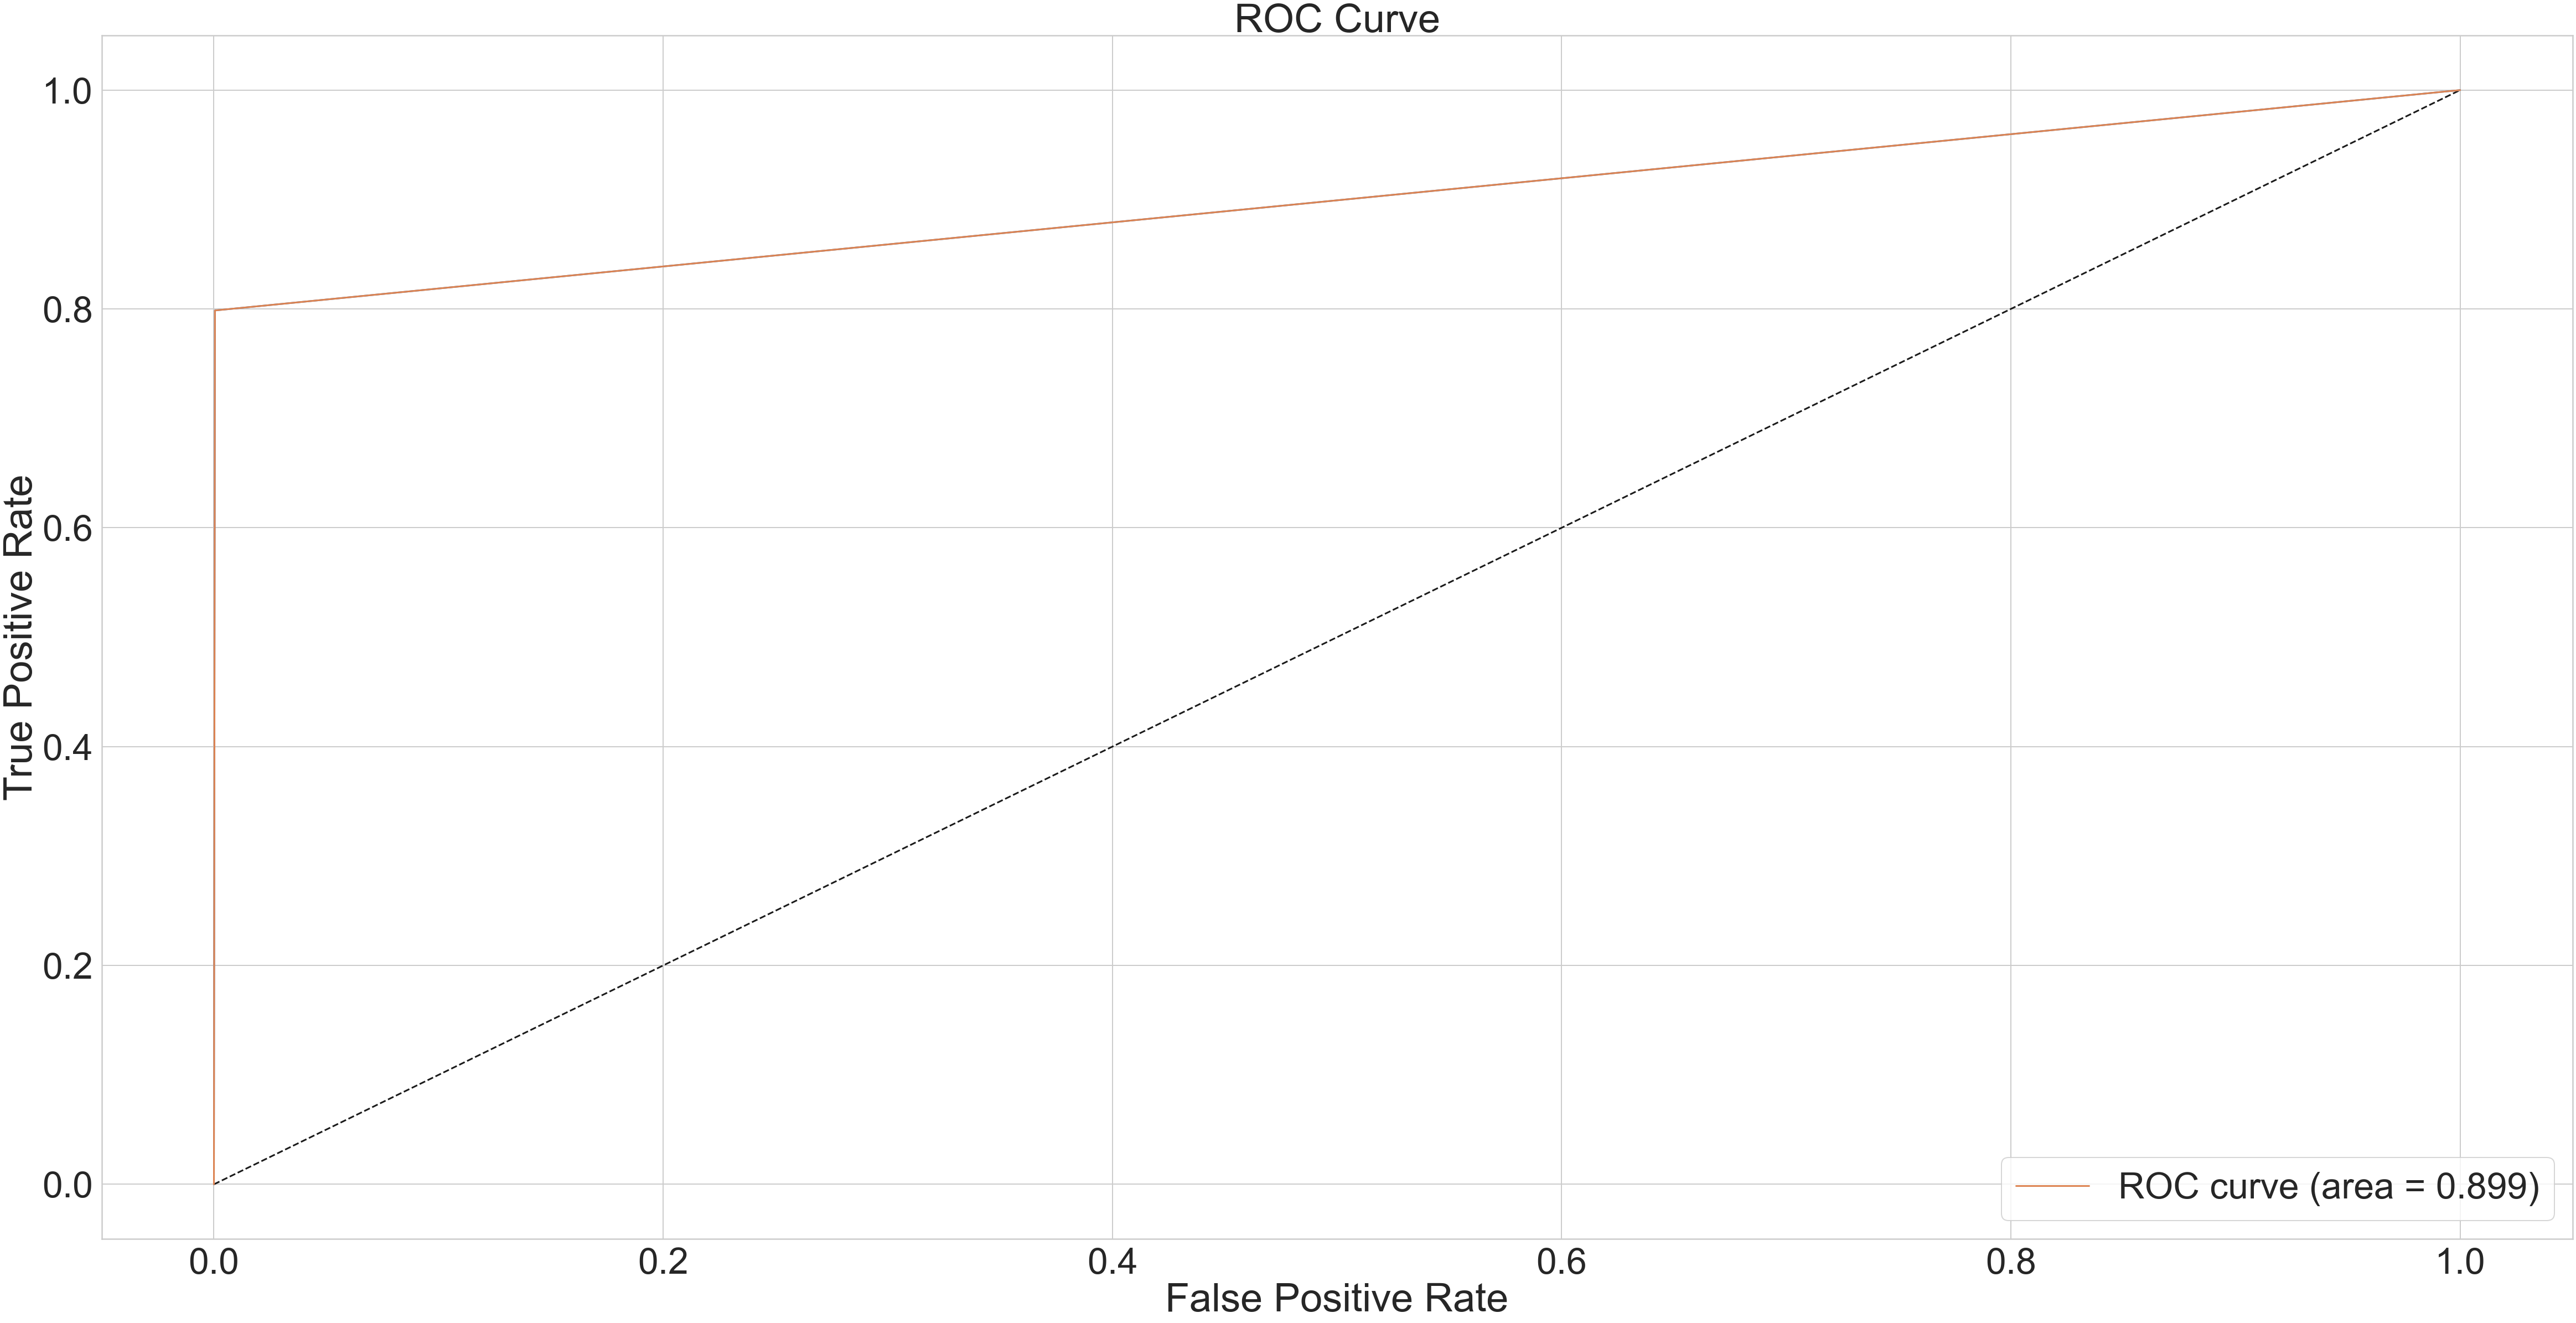

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

While the logistic regression and Support vector Classifier gives a recall of 67% and 0% respectively, Decision tree gives us a very good recall, almost 74%. The ROC-AUC value is also better than the other classifiers which proves the efficacy of the Decision Tree. This prediction can also be improved by hyper-parameter tuning.

# Feature Importance Plot

Feature importance plot indicates the relative importance of each feature when making a prediction.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

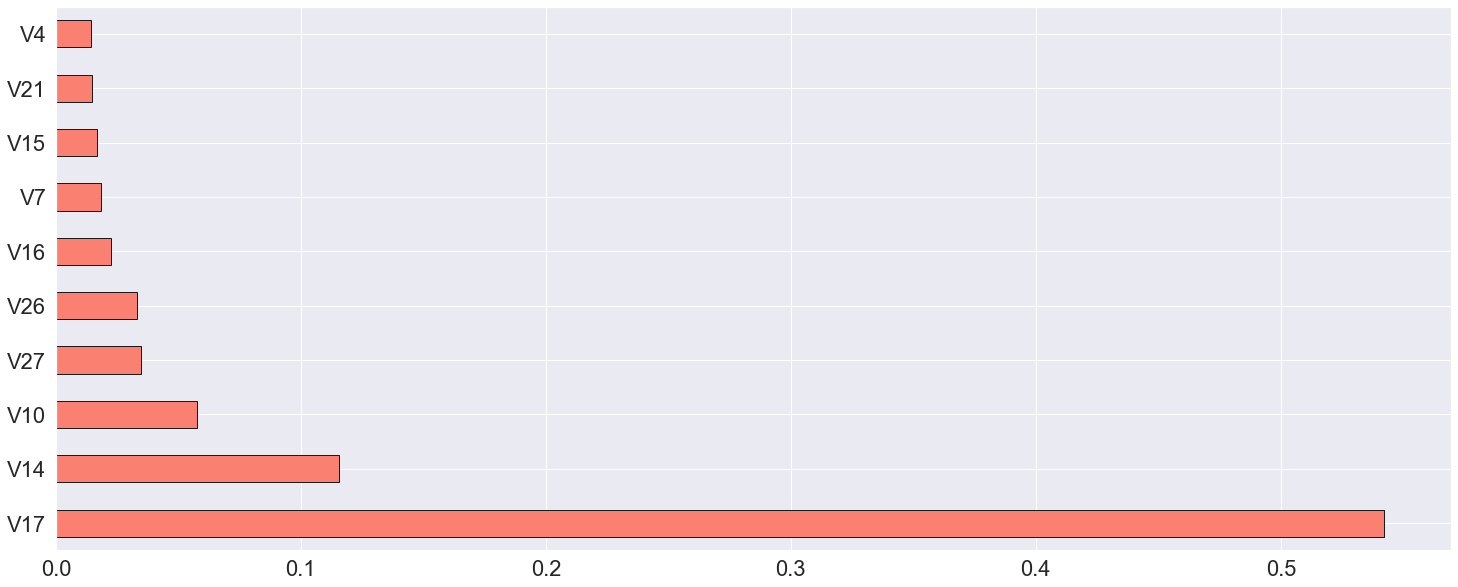

In [74]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
feat_importances = pd.Series(dtree.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh',color='salmon',edgecolor='k');

# Random Forest

Random forests algorithms are used for classification and regression. The random forest is an ensemble learning method, composed of multiple decision trees. By averaging out the impact of several decision trees, random forests tend to improve prediction. 

In [37]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[85292     7]
 [   30   114]]


In [39]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.79      0.86       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.899


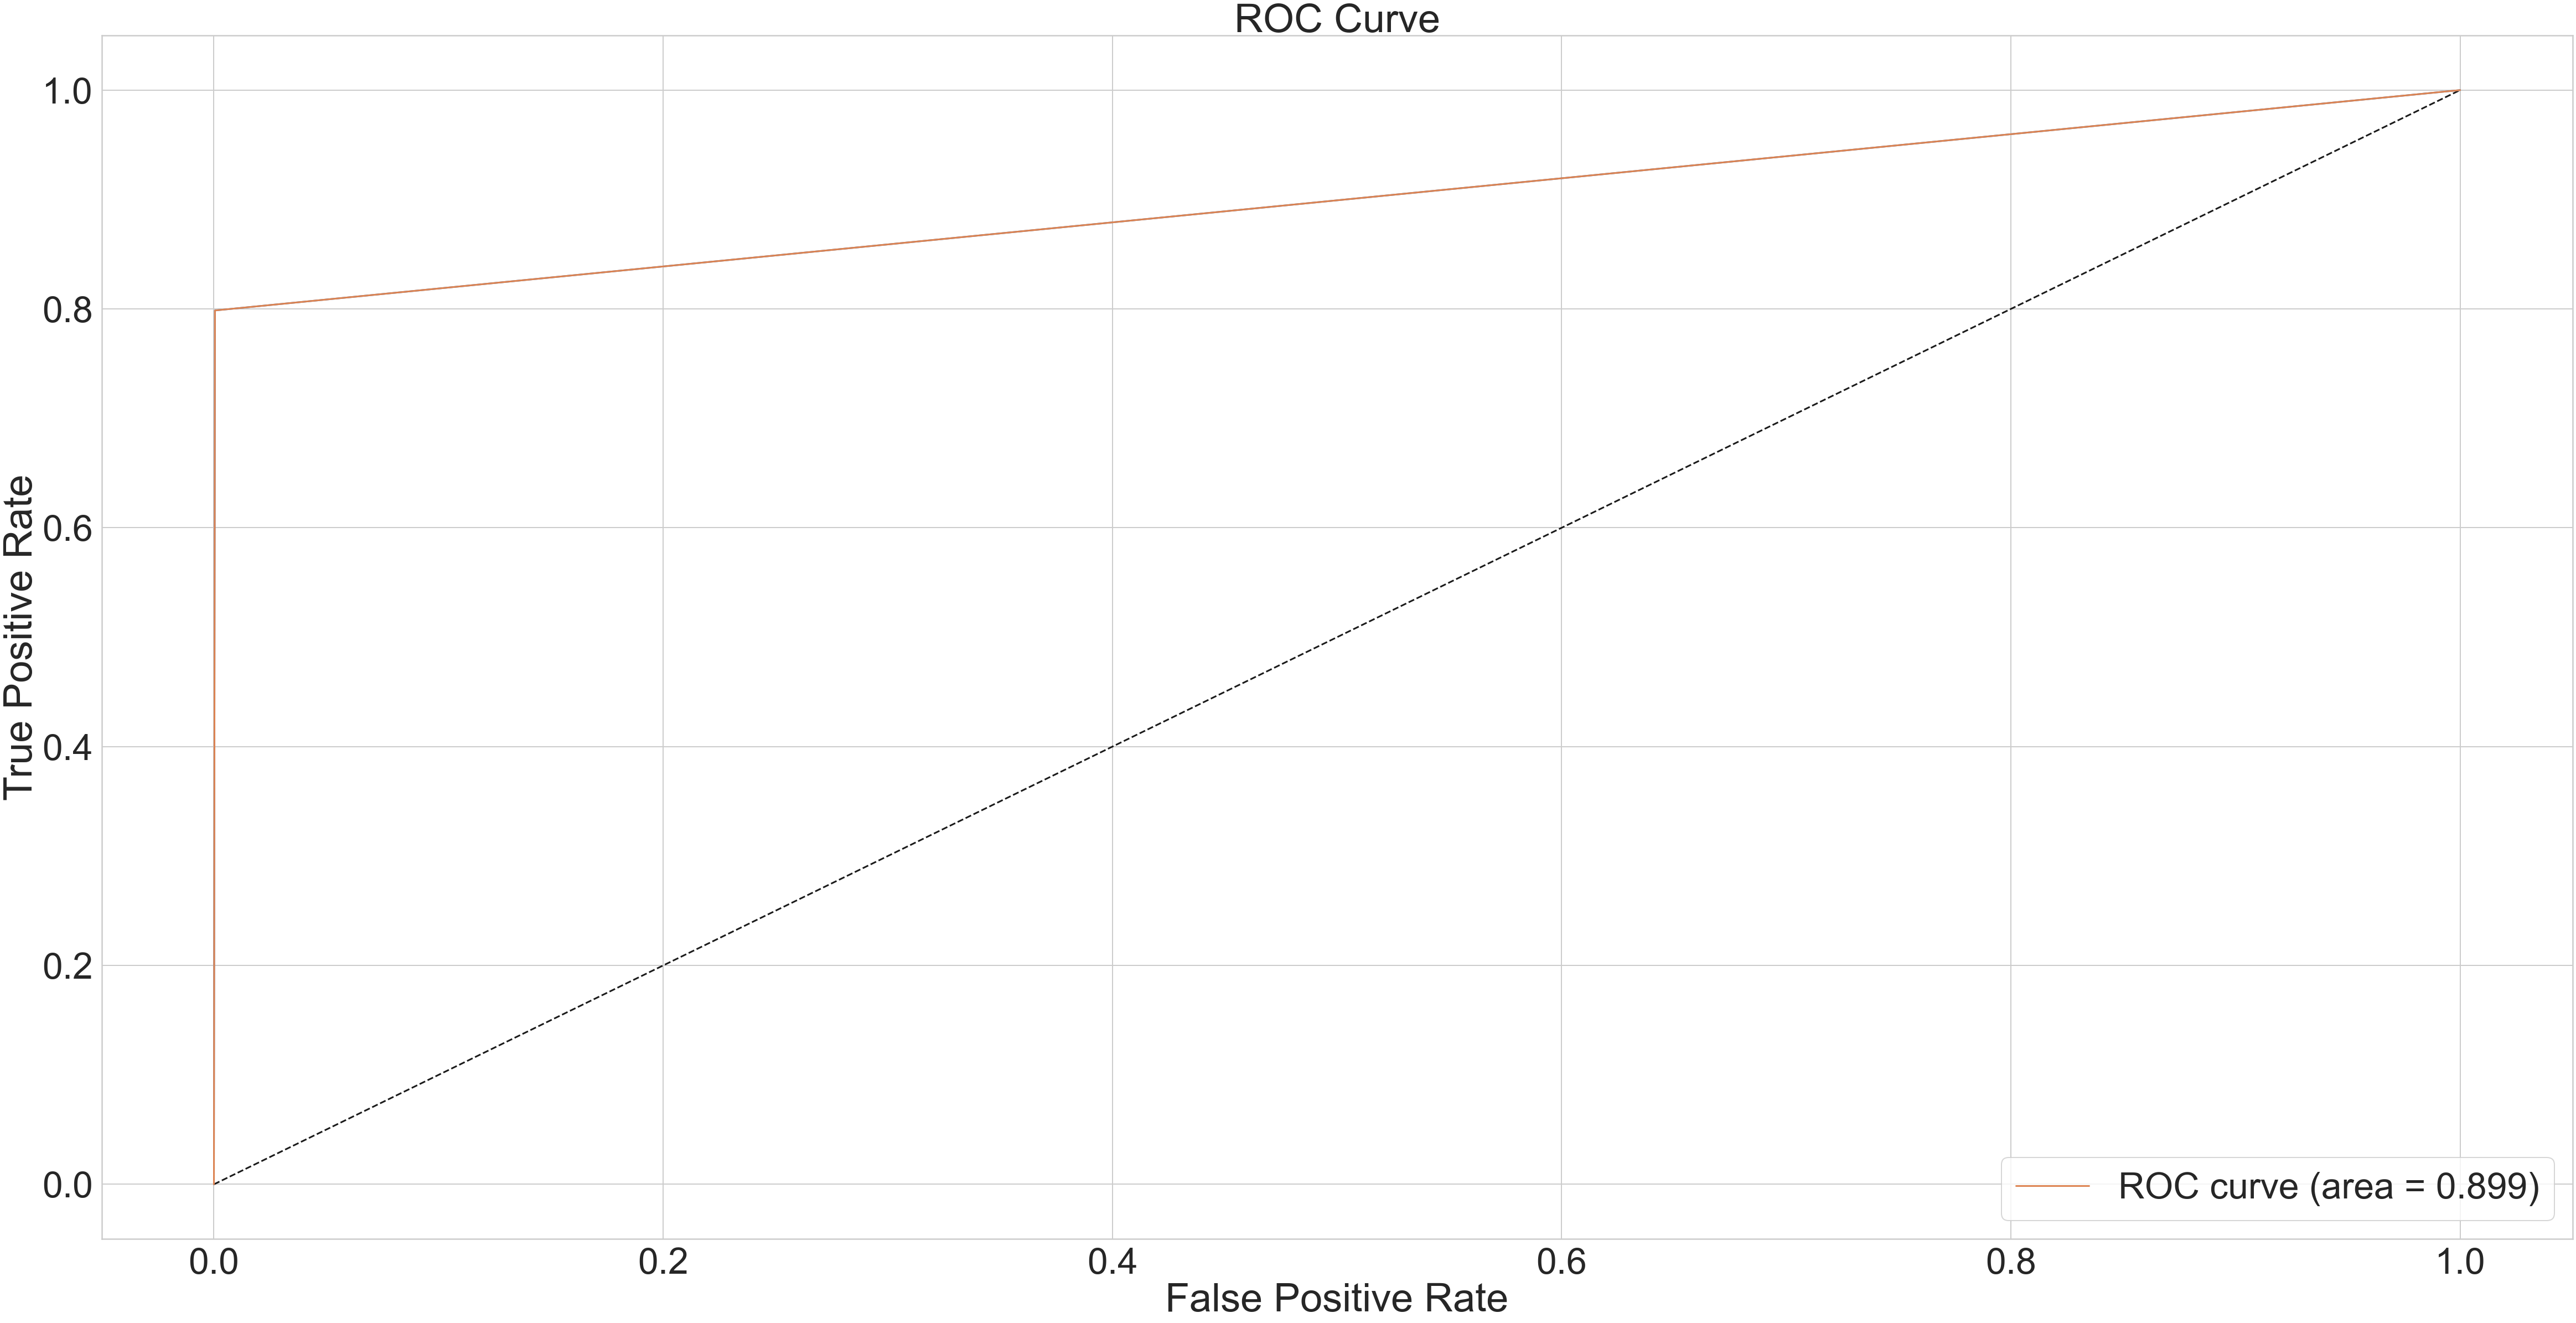

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

We can see that using Random Forest, the Recall has improved to 80%.

# Ada Boost Classifier

AdaBoost, short for “Adaptive Boosting”, is the first practical boosting algorithm proposed by Freund and Schapire in 1996. It focuses on classification problems and aims to convert a set of weak classifiers into a strong one.

In [41]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [42]:
predictions = ada.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions))

[[85255    44]
 [   34   110]]


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.71      0.76      0.74       144

    accuracy                           1.00     85443
   macro avg       0.86      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.882


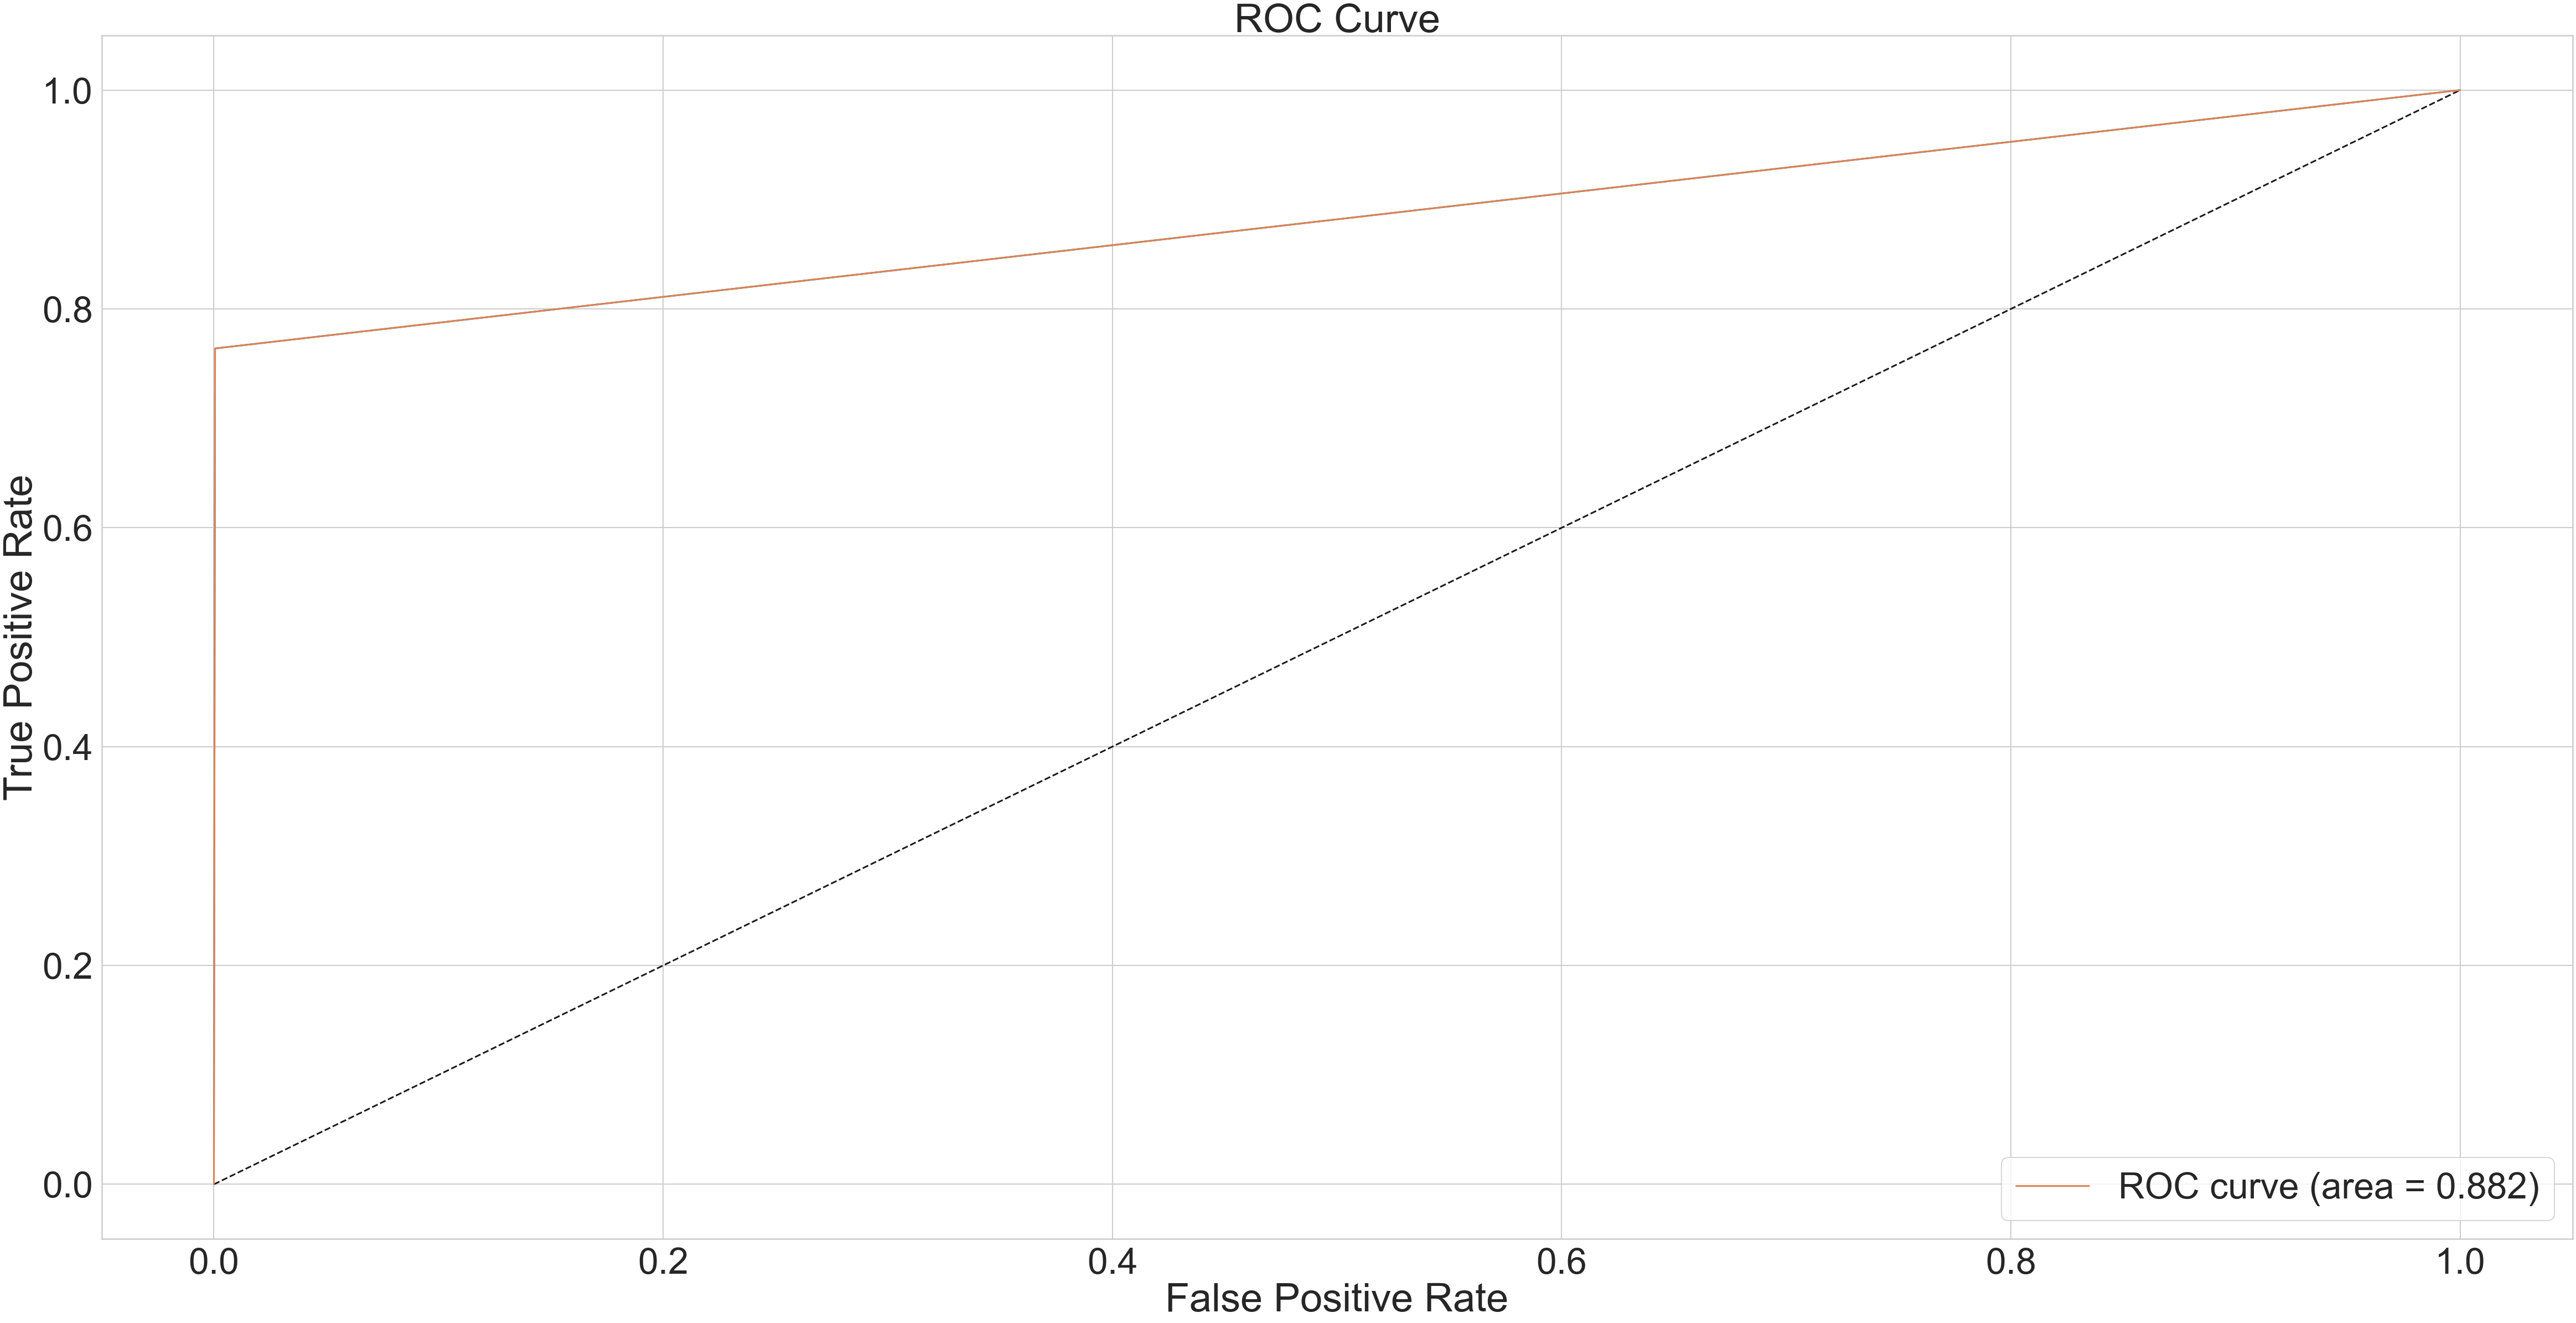

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Ada-Boost gives a recall of 76% which shows that it performs worse than the random forest classifier.

# Neural Network

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

In [46]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [47]:
MLPC = MLPClassifier(hidden_layer_sizes=(500,), max_iter=10000)
MLPC.fit(X_train, y_train)
y_pred = MLPC.predict(X_test)
recall_acc = recall_score (y_test,y_pred)
recall_acc 

0.7222222222222222

In [48]:
print(confusion_matrix(y_test,y_pred))

[[85135   164]
 [   40   104]]


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.39      0.72      0.50       144

    accuracy                           1.00     85443
   macro avg       0.69      0.86      0.75     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.860


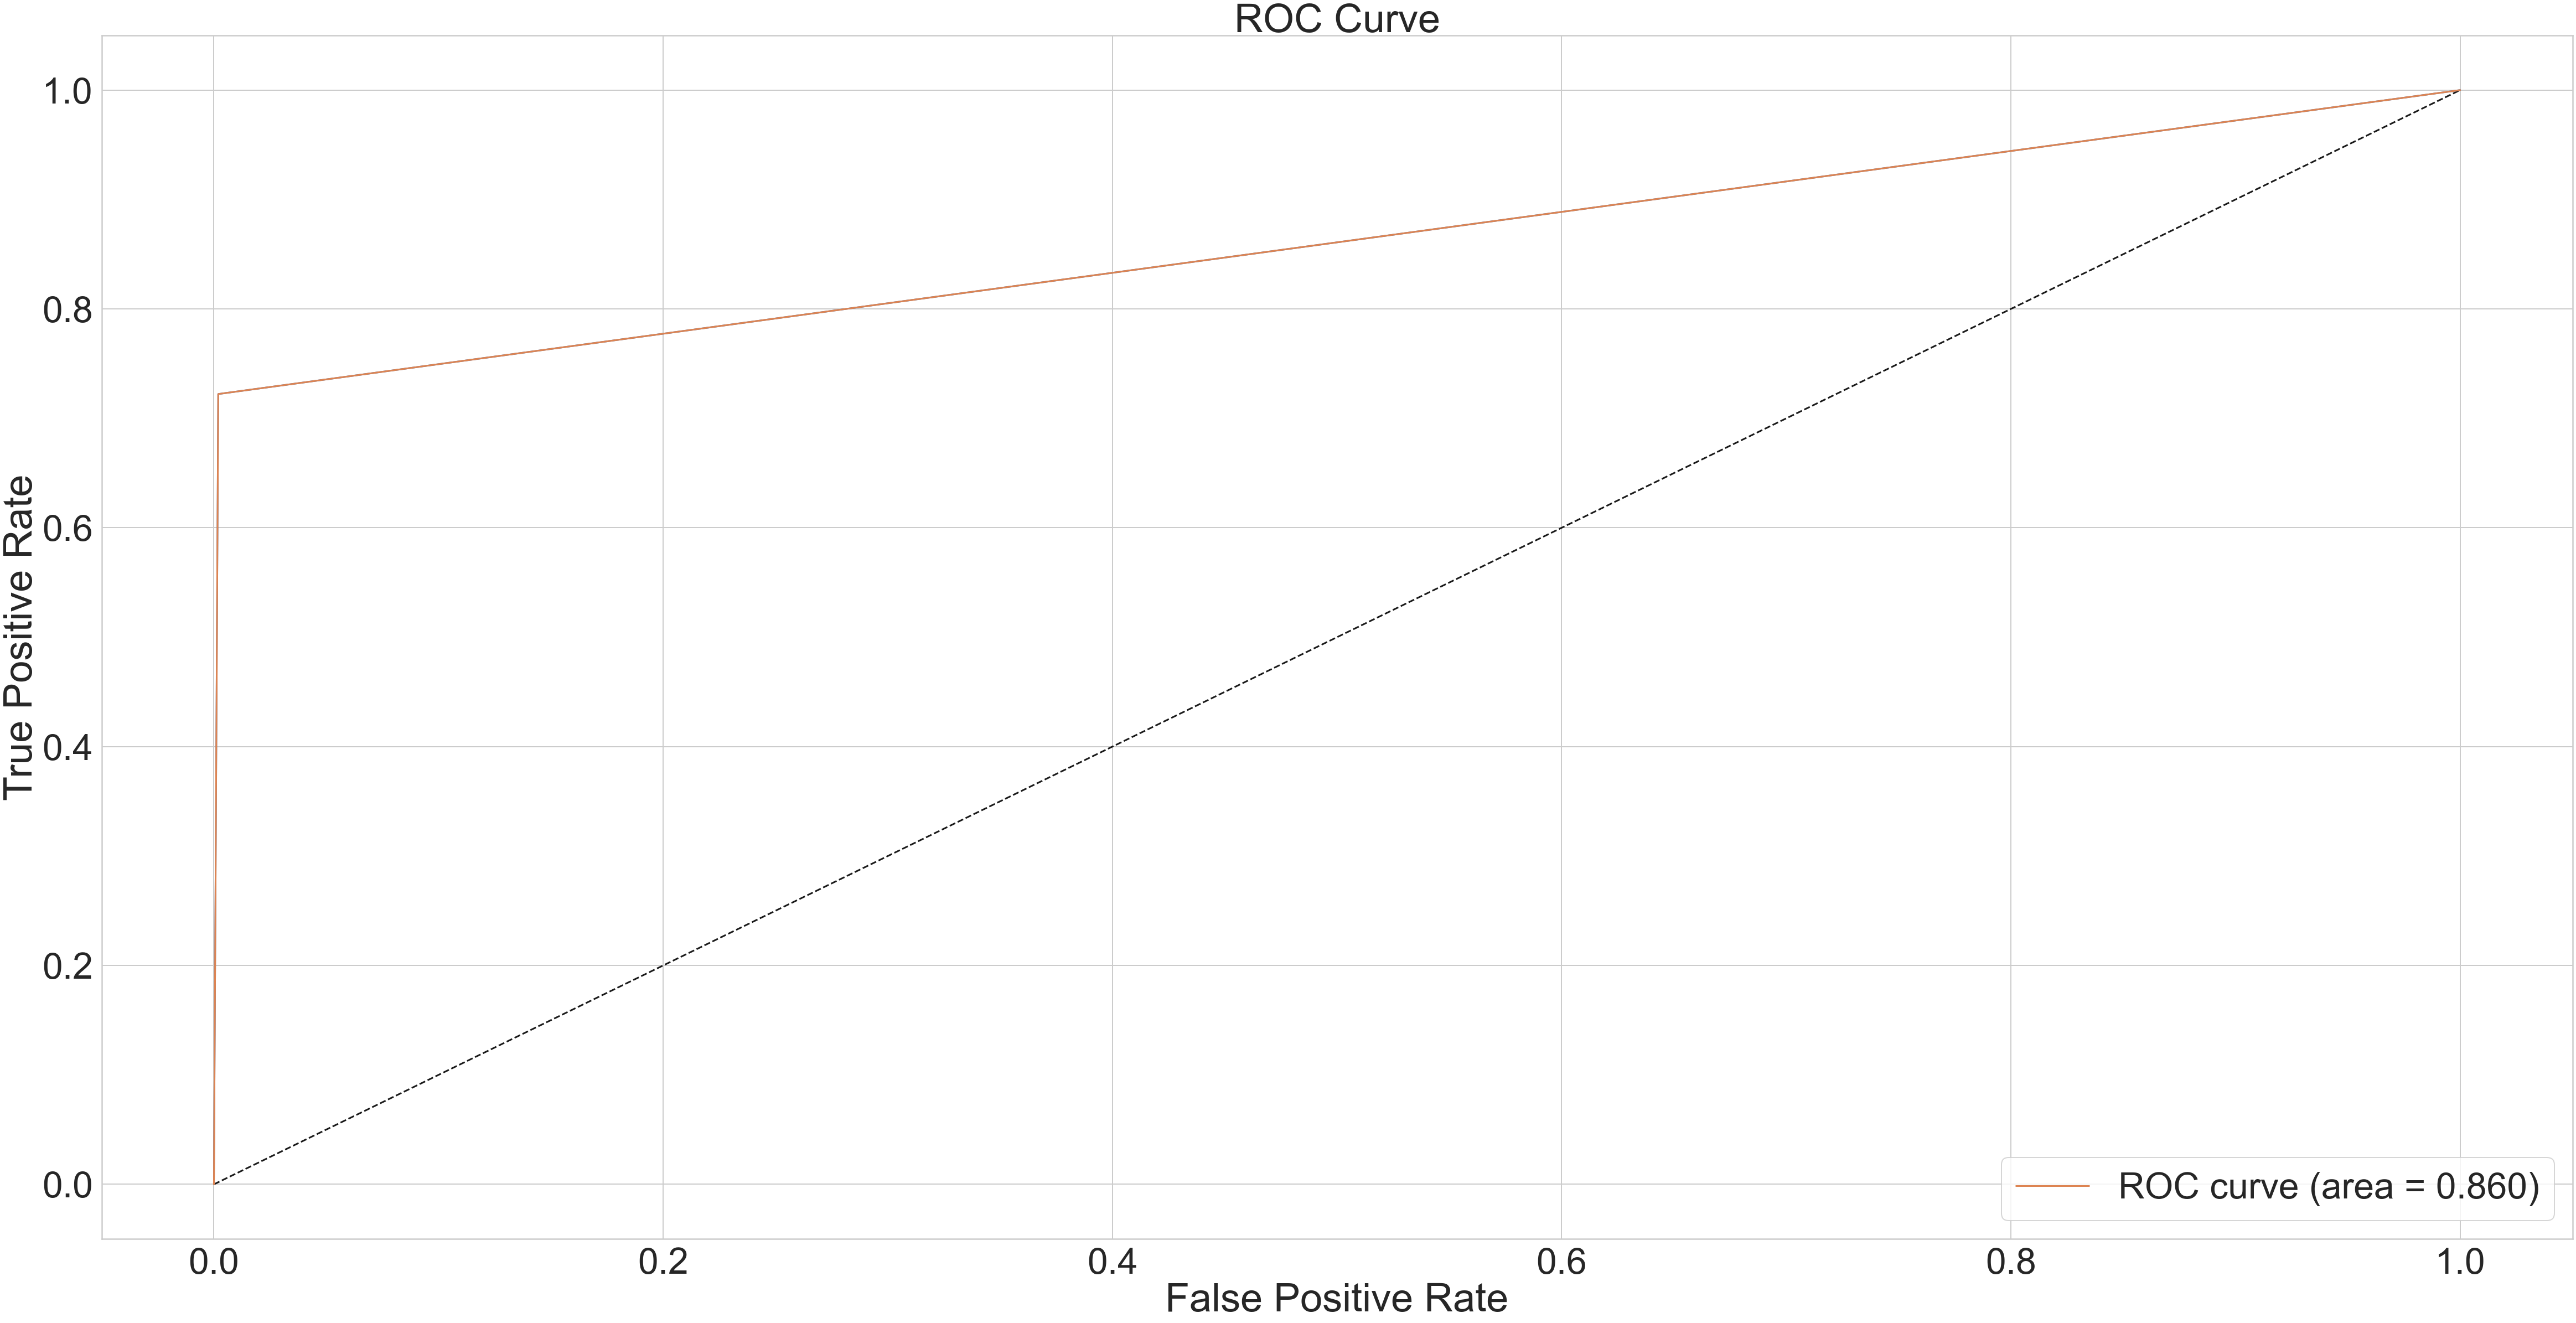

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

End of Notebook.